In [1]:
## 
import json
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.ticker import NullFormatter
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import matplotlib as mpl
import numpy as np
import networkx as nx
import scipy as sp
from scipy.optimize import leastsq
import sys
import random
import numpy as np
datapath = "F:\\master\\myWork\\18familiarStrangers\\data\\"
functionPath = "F:\\master\\myWork\\18familiarStrangers\\"
sys.path.append(functionPath)
# %pylab inline

In [2]:
%qtconsole

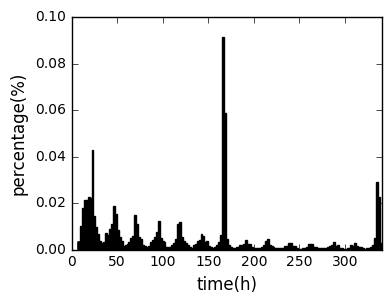

In [3]:
## return period
dataset = "fdu2014"
return_period_series = json.load(open(datapath+"%s\\basic\\return_period_series.json"%dataset))
weights = np.ones_like(return_period_series)/float(len(return_period_series))
plt.figure(figsize=(4,3))
plt.hist(return_period_series, bins = 1000, weights = weights, color = 'black')
plt.xlim(0,340)
plt.xlabel("time(h)", fontsize=12)
plt.ylabel("percentage(%)",fontsize=12)
plt.show()

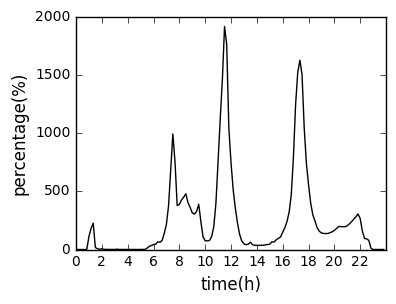

In [4]:
## active node number VS time
dataset = "sjtuecard"
deltaT = 10 #min
T = 24 #hour
time_node = json.load(open(datapath+"%s\\basic\\activeNodeVSTime_%s.json"%(dataset,deltaT)))
t_n = np.array(time_node[0:T*60/deltaT])
for i in range(1,len(time_node)/(T*60/deltaT)):
    tmp = np.array(time_node[i*T*60/deltaT:(i+1)*T*60/deltaT])
    t_n = t_n + tmp
t_n = t_n/(len(time_node)/float((T*60/deltaT)))

plt.figure(figsize=(4,3))
plt.plot(range(len(t_n)), t_n, color = 'black')
plt.xlim(0,T*60/deltaT)
plt.xticks(range(0,T*60/deltaT,12),map(str,np.array(range(0,24,2))))
plt.xlabel("time(h)", fontsize=12)
plt.ylabel("percentage(%)",fontsize=12)
plt.show()

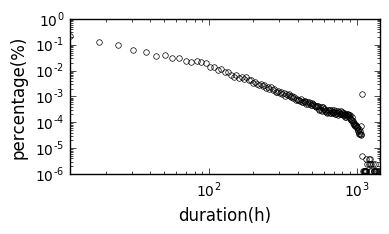

In [5]:
## associating duration
datasets = ["usc2006"]
colors = ["ok","^r","sg"]
plt.figure(figsize=(4,2))
ci = 0
for dataseti in datasets:
    du= json.load(open(datapath+"%s\\basic\\duration.json"%dataseti))
    weights = np.ones_like(du)/float(len(du))
    [n,bins] = np.histogram(du,bins=300,weights=weights)
    xx = list(n)
    xx.reverse()
    xx = list(np.cumsum(xx))
    xx.reverse()
    plt.loglog(bins[1:],n, colors[ci], markersize=4,fillstyle="none", label=dataseti)
    ci += 1
plt.xlim(0,24*60)
# plt.legend(fontsize=10,loc="lower left")
plt.xlabel("duration(h)", fontsize=12)
plt.ylabel("percentage(%)",fontsize=12)
plt.show()

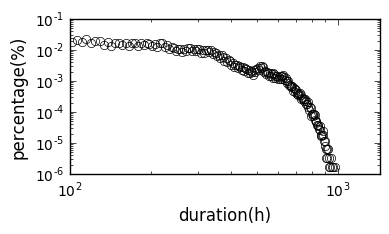

In [6]:
## transport frequency
datasets = ["fdu2014"]
colors = ["ok","^r","sg"]
plt.figure(figsize=(4,2))
ci=0
for dataseti in datasets:
    du= json.load(open(datapath+"%s\\basic\\locationChangeFre.json"%dataseti))
    weights = np.ones_like(du)/float(len(du))
    [n,bins] = np.histogram(du,bins=200,weights=weights)
    xx = list(n)
    xx.reverse()
    xx = list(np.cumsum(xx))
    xx.reverse()
    plt.loglog(bins[1:], n, colors[ci], markersize=6, fillstyle="none")
    ci += 1
plt.xlim(100,24*60)
plt.xlabel("duration(h)", fontsize=12)
plt.ylabel("percentage(%)",fontsize=12)
plt.show()

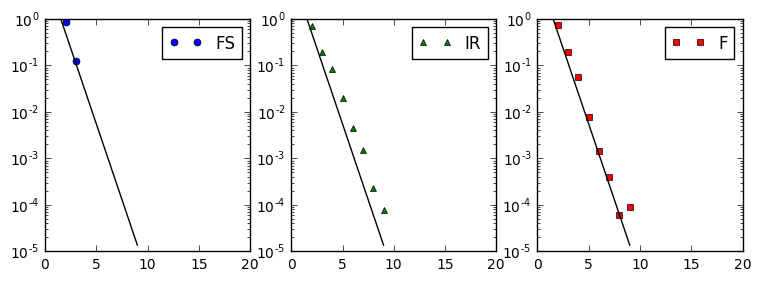

In [7]:
# encounter location distribution
dataset = "fdu2009"
er = {"fdu2013":{"e0":2.000,"r0":0.106},
      "fdu2014":{"e0":2.000,"r0":0.0834083},
      "fdu2009":{"e0":1.585,"r0":0.069507},
      "usc2006":{"e0":1.585,"r0":0.002},
      "gowalla":{"e0":1.000,"r0":0.0004735},
      "sjtuecard":{"e0":2.322,"r0":0.008}}
e0 = er[dataset]["e0"]
r0 = er[dataset]["r0"]
fr = open(datapath + "%s\\basic\\dyad_e_r_t_l_w_all_%s.txt"%(dataset,dataset))
lfs = []
lir = []
lf = []
line = fr.readline().replace("\n","")
count = 0
while line:
    count += 1
    if count%1000000==0:
        print count
    e = float(line.split("\t")[1])
    r = float(line.split("\t")[2])
    t = int(line.split("\t")[3])
    l = int(line.split("\t")[4])
    if e>=e0 and r>=r0:
        lir.append(l)
    elif e>=e0 and r<r0:
        lf.append(l)
    elif e<e0 and r>=r0 and t>1:
        lfs.append(l)
    else:
        pass
    line = fr.readline().replace("\n","")
fr.close()

plt.figure(figsize=(9,3))
plt.subplot(1,3,1)
weights = np.ones_like(lfs)/float(len(lfs))
n,bins = np.histogram(lfs,bins=range(0,20),weights=weights)
plt.semilogy(bins[1:],n,"bo",label="FS", markersize=5)
plt.legend()
plt.ylim(1e-5,1)
x = range(1,10)
y = [10*np.exp(-1.5*xi) for xi in x]
plt.semilogy(x,y,"k-")

plt.subplot(1,3,2)
weights = np.ones_like(lir)/float(len(lir))
n,bins = np.histogram(lir,bins=range(0,20),weights=weights)
plt.semilogy(bins[1:],n,"g^",label="IR", markersize=5)
plt.legend()
plt.ylim(1e-5,1)
x = range(1,10)
y = [10*np.exp(-1.5*xi) for xi in x]
plt.semilogy(x,y,"k-")

plt.subplot(1,3,3)
weights = np.ones_like(lf)/float(len(lf))
n,bins = np.histogram(lf,bins=range(0,20),weights=weights)
plt.semilogy(bins[1:],n,"rs",label="F", markersize=5)
plt.legend()
plt.ylim(1e-5,1)
x = range(1,10)
y = [10*np.exp(-1.5*xi) for xi in x]
plt.semilogy(x,y,"k-")

plt.show()

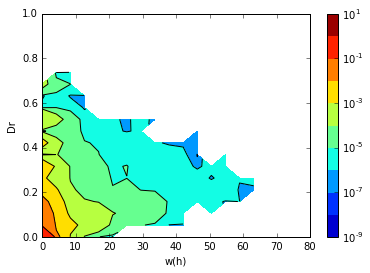

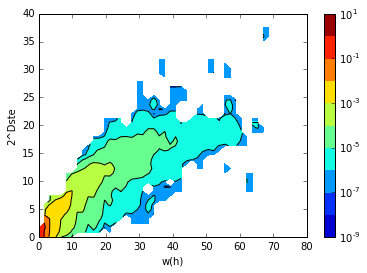

In [43]:
## Dr vs weight
dataset = "fdu2009"
e0 = 1.585#2.000 #1.585 #2.322  # 2.000
r0 = 0.069507#0.106 #0.069507 #0.0119012  # 0.0834083
fr = open(datapath + "%s\\basic\\dyad_e_r_t_l_w_all_%s.txt"%(dataset,dataset))
weight = []
r = []
e = []
linei = fr.readline().replace("\n","")
count = 0
while linei:
    count += 1
    if count %1000000 == 0:
        print count
    splits = linei.split("\t")
    r.append(float(splits[2]))
    e.append(float(splits[1]))
    weight.append(float(splits[3]))
    linei = fr.readline().replace("\n","")
fr.close()
plt.figure()
weights = np.ones_like(weight)/float(len(weight))
n,b1,b2 = np.histogram2d(weight, r, bins = [30, 30], range = [[0, 80], [0,1]], weights=weights)
xx = []
yy = []
zz = []
for i in range(len(n)):
    for j in range(len(n[0])):
        xx.append(b1[i])
        yy.append(b2[j])
        zz.append(n[i][j])
xi = np.linspace(0, 80, 20)
yi = np.linspace(0, 1, 20)
zi = griddata(xx, yy, zz, xi, yi, interp='linear')
CS = plt.contour(xi, yi, zi, 10, linewidths=1, colors='k',norm=LogNorm())
CS = plt.contourf(xi, yi, zi, 10, cmap=plt.cm.jet,norm=LogNorm())
plt.colorbar()
plt.xlabel("w(h)")
plt.ylabel("Dr")

plt.figure()
e1 = 2**np.array(e)
n,b1,b2 = np.histogram2d(weight, e1, bins = [50, 20], range = [[0, 80], [0,40]], weights = weights)
xx = []
yy = []
zz = []
for i in range(len(n)):
    for j in range(len(n[0])):
        xx.append(b1[i])
        yy.append(b2[j])
        zz.append(n[i][j])
xi = np.linspace(0, 80, 50)
yi = np.linspace(0, 40, 50)
zi = griddata(xx, yy, zz, xi, yi, interp='linear')
CS = plt.contour(xi, yi, zi, 10, linewidths=1, colors='k',norm=LogNorm())
CS = plt.contourf(xi, yi, zi, 10, cmap=plt.cm.jet,norm=LogNorm())
plt.colorbar()
plt.xlabel("w(h)")
plt.ylabel("2^Dste")
plt.show()

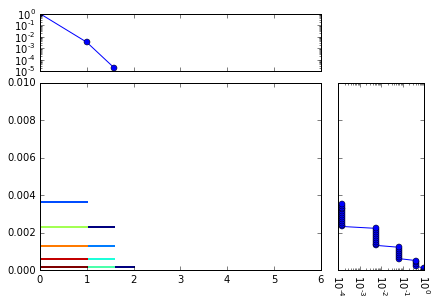

In [11]:
# null model e-r distribution
method = 'v1_1'
N = 5000
dataset = "usc2006"
eList = []
rList = []
fr = open(datapath + "%s\\nullmodel\\dyad_e_r_null_%s_%s.txt" % (dataset, N, method))
line = fr.readline().replace("\n","")
while line:
    e,r = map(float, line.split("\t"))
    eList.append(round(e, 3))
    rList.append(round(r, 7))
    line = fr.readline().replace("\n","")
fr.close()

xmin = min(eList)
xmax = max(eList)
ymin = min(rList)
ymax = max(rList)

nullfmt   = NullFormatter() 
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left+width+0.04
x_bins = np.round(np.log2(np.array(range(1,64))),3)
y_bins = np.linspace(0,0.01,100)
rect_heatmap= [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]
axheatmap = plt.axes(rect_heatmap)
# axheatmap.xaxis.set_label("spatio-temporal entropy")
# axheatmap.yaxis.set_label("regularity")
# axheatmap.set_title("entropy_regularity distribution of null model")
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)
[a,b,c,d] = axheatmap.hist2d(eList, rList, bins = [x_bins, y_bins], range = [[0, 6], [0, 1]],norm=LogNorm())

binwidth = 0.25
binwidth2 = 0.005
xymax = np.max( [np.max(np.fabs(eList)), np.max(np.fabs(rList))] )
lim = ( int(xymax/binwidth) + 1) * binwidth
axheatmap.set_xlim( (0, 6) )
axheatmap.set_ylim( (0, 0.01) )
weights1 = np.ones_like(eList)/float(len(eList)) 
weights2 = np.ones_like(rList)/float(len(rList)) 

nx,binsx = np.histogram(eList,bins=x_bins,weights = weights1)
xx = list(nx)
xx.reverse()
xx = list(np.cumsum(xx))
xx.reverse()
axHistx.semilogy(binsx[:-1],xx,'-o')

axHisty.set_xticklabels(axHisty.xaxis.get_ticklabels(),rotation = -90)
ny,binsy = np.histogram(rList,bins=y_bins,weights = weights2)
yy = list(ny)
yy.reverse()
yy = list(np.cumsum(yy))
yy.reverse()
axHisty.semilogx(yy,binsy[:-1],'-o')

axHistx.set_xlim( axheatmap.get_xlim() )
axHisty.set_ylim( axheatmap.get_ylim() )
plt.show()

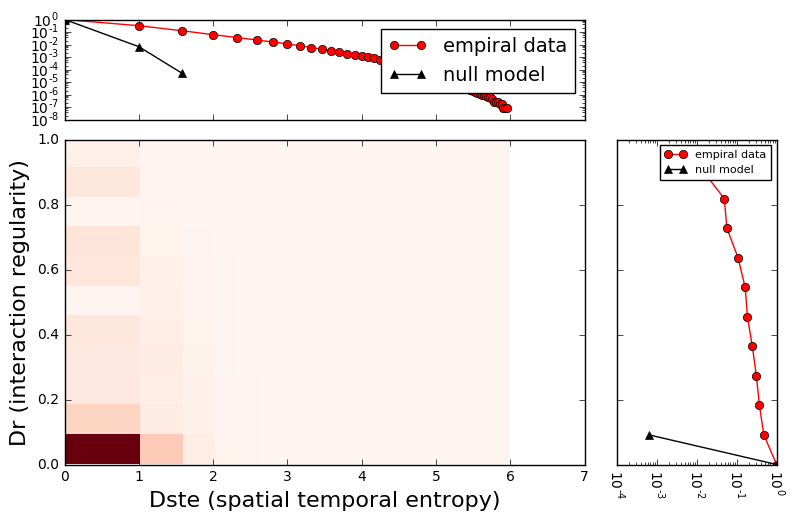

In [8]:
# real model e-r distribution
method1 = 'v4'
method2 = 'v4'
N = 5000
dataset = "fdu2013"
eList = []
rList = []
fr = open(datapath + "%s\\basic\\dyad_e_r_t_l_w_all_%s.txt" % (dataset,dataset))
line = fr.readline().replace("\n","")
while line:
    e,r = map(float, line.split("\t")[1:3])
    eList.append(round(e, 3))
    rList.append(round(r, 7))
    line = fr.readline().replace("\n","")
fr.close()
eList0 = []
rList0 = []
fr = open(datapath + "%s\\nullmodel\\dyad_e_r_null_%s_%s.txt" % (dataset, N, method1))
line = fr.readline().replace("\n","")
while line:
    e,r = map(float, line.split("\t"))
    eList0.append(round(e, 3))
    line = fr.readline().replace("\n","")
fr.close()
fr = open(datapath + "%s\\nullmodel\\dyad_e_r_null_%s_%s.txt" % (dataset, N, method2))
line = fr.readline().replace("\n","")
while line:
    e,r = map(float, line.split("\t"))
    rList0.append(round(r, 7))
    line = fr.readline().replace("\n","")
fr.close()

xmin = min(eList)
xmax = max(eList)
ymin = min(rList)
ymax = max(rList)

fig = plt.figure(figsize=(8,5))
nullfmt   = NullFormatter() 
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left+width+0.04
x_bins = np.round(np.log2(np.array(range(1,64))),3)
# x_bins = range(1,64)
y_bins = np.linspace(0,1,8)
x_bins0 = np.round(np.log2(np.array(range(1,64))),3)
y_bins0 = np.linspace(0,1,12)
rect_heatmap= [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]
axheatmap = plt.axes(rect_heatmap)
# axheatmap.xaxis.set_label("spatio-temporal entropy")
# axheatmap.yaxis.set_label("regularity")
# axheatmap.set_title("entropy_regularity distribution of null model")
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)
[a,b,c,d] = axheatmap.hist2d(eList, rList, bins = [x_bins, y_bins0], range = [[0, 7], [0, 1]], cmap=plt.cm.Reds)
binwidth = 0.25
binwidth2 = 0.01
xymax = np.max( [np.max(np.fabs(eList)), np.max(np.fabs(rList))] )
lim = ( int(xymax/binwidth) + 1) * binwidth
axheatmap.set_xlim( (0, 7) )
axheatmap.set_ylim( (0, 1) )
axheatmap.set_xlabel("Dste (spatial temporal entropy)", fontsize=16)
axheatmap.set_ylabel("Dr (interaction regularity)",fontsize=16)
bins1 = np.arange(0, lim + binwidth, binwidth)
bins2 = np.arange(0, lim + binwidth2, binwidth2)
weights1 = np.ones_like(eList)/float(len(eList)) 
weights2 = np.ones_like(rList)/float(len(rList)) 

nx,binsx = np.histogram(eList,bins=x_bins,weights = weights1)
xx = list(nx)
xx.reverse()
xx = list(np.cumsum(xx))
xx.reverse()
axHistx.semilogy(binsx[:-1],xx,'-ro',label="empiral data")

axHisty.set_xticklabels(axHisty.xaxis.get_ticklabels(),rotation = -90 )
ny,binsy = np.histogram(rList,bins=y_bins0,weights = weights2)
yy = list(ny)
yy.reverse()
yy = list(np.cumsum(yy))
yy.reverse()
axHisty.semilogx(yy,binsy[:-1],'-ro',label="empiral data")

 # null
weights10 = np.ones_like(eList0)/float(len(eList0)) 
weights20 = np.ones_like(rList0)/float(len(rList0)) 

nx0,binsx0 = np.histogram(eList0,bins=x_bins,weights = weights10)
xx = list(nx0)
xx.reverse()
xx = list(np.cumsum(xx))
xx.reverse()
axHistx.semilogy(binsx0[:-1],xx,'-k^',label="null model")

axHisty.set_xticklabels(axHisty.xaxis.get_ticklabels(),rotation = -90 )
ny0,binsy0 = np.histogram(rList0,bins = y_bins0,weights = weights20)
yy = list(ny0)
yy.reverse()
yy = list(np.cumsum(yy))
yy.reverse()
axHisty.semilogx(yy,binsy0[:-1],'-k^',label="null model")

axHistx.set_xlim( axheatmap.get_xlim() )
axHisty.set_ylim( axheatmap.get_ylim() )
axHistx.legend(fontsize=14)
axHisty.legend(loc="upper right",fontsize=8)
plt.show()

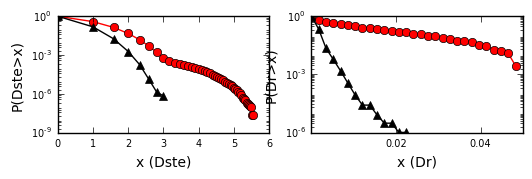

In [9]:
# real null e-r distribution (format 2)
method1 = 'v3' #fdu13:simulate-e, usc06:v1, sjtu:v3
method2 = 'v3'
N = 5000
dataset = "sjtuecard"
result = {}
result[dataset] = {}
result[dataset]["null"] = {}
result[dataset]["real"] = {}
eList = []
rList = []
fr = open(datapath + "%s\\basic\\dyad_e_r_t_l_w_all_%s.txt" % (dataset,dataset))
line = fr.readline().replace("\n","")
while line:
    e,r = map(float, line.split("\t")[1:3])
    eList.append(round(e, 3))
    rList.append(round(r, 7))
    line = fr.readline().replace("\n","")
fr.close()
eList0 = []
rList0 = []
fr = open(datapath + "%s\\nullmodel\\dyad_e_r_null_%s_%s.txt" % (dataset, N, method1))
line = fr.readline().replace("\n","")
while line:
    e,r = map(float, line.split("\t"))
    eList0.append(round(e, 3))
    line = fr.readline().replace("\n","")
fr.close()
fr = open(datapath + "%s\\nullmodel\\dyad_e_r_null_%s_%s.txt" % (dataset, N, method2))
line = fr.readline().replace("\n","")
while line:
    e,r = map(float, line.split("\t"))
    rList0.append(round(r, 7))
    line = fr.readline().replace("\n","")
fr.close()

xmin = min(eList)
xmax = max(eList)
ymin = min(rList)
ymax = max(rList)

plt.figure(figsize=(6,1.5))
x_bins0 = np.round(np.log2(np.array(range(1,64))),3)
y_bins0 = np.linspace(0,0.05,30)
weights1 = np.ones_like(eList)/float(len(eList)) 
weights2 = np.ones_like(rList)/float(len(rList)) 
sub1 = plt.subplot(1,2,1)
sub2 = plt.subplot(1,2,2)
nx,binsx = np.histogram(eList,bins=x_bins0,weights = weights1)
xx = list(nx)
xx.reverse()
xx = list(np.cumsum(xx))
xx.reverse()
sub1.semilogy(binsx[:-1],xx,'-ro',label="real")

# axHisty.set_xticklabels(axHisty.xaxis.get_ticklabels())
ny,binsy = np.histogram(rList,bins=y_bins0,weights = weights2)
yy = list(ny)
yy.reverse()
yy = list(np.cumsum(yy))
yy.reverse()
sub2.semilogy(binsy[:-1],yy,'-ro',label="real")

# result[dataset]["real"]["e_x"] = list(binsx[:-1])
# result[dataset]["real"]["e_y"] = list(xx)
# result[dataset]["real"]["r_x"] = list(binsy[:-1])
# result[dataset]["real"]["r_y"] = list(yy)

# null
weights10 = np.ones_like(eList0)/float(len(eList0)) 
weights20 = np.ones_like(rList0)/float(len(rList0)) 

nx0,binsx0 = np.histogram(eList0,bins=x_bins0,weights = weights10)
xx = list(nx0)
xx.reverse()
xx = list(np.cumsum(xx))
xx.reverse()
sub1.semilogy(binsx0[:-1],xx,'-k^',label="null")

# axHisty.set_xticklabels(axHisty.xaxis.get_ticklabels())
ny0,binsy0 = np.histogram(rList0,bins = y_bins0,weights = weights20)
yy = list(ny0)
yy.reverse()
yy = list(np.cumsum(yy))
yy.reverse()
sub2.semilogy(binsy0[:-1],yy,'-k^',label="null")

# result[dataset]["null"]["e_x"] = list(binsx0[:-1])
# result[dataset]["null"]["e_y"] = list(xx)
# result[dataset]["null"]["r_x"] = list(binsy0[:-1])
# result[dataset]["null"]["r_y"] = list(yy)

# sub1.legend(fontsize=8)
# sub1.legend(loc="upper right",fontsize=8)
sub1.set_yticks([1e-9,1e-6,1e-3,1])
sub1.set_xlabel("x (Dste)")
sub1.set_ylabel("P(Dste>x)")
axis1 = sub1.xaxis
for label in axis1.get_ticklabels():
    label.set_fontsize(7)
axis1 = sub1.yaxis
for label in axis1.get_ticklabels():
    label.set_fontsize(7)

# sub2.legend(loc="lower right",fontsize=8)
sub2.set_xlabel("x (Dr)")
sub2.set_ylabel("P(Dr>x)")
sub2.set_yticks([1e-6,1e-3,1])
# sub2.set_xticks([0.2,0.4,0.6,0.8])
sub2.set_xticks([0.02,0.04])
axis2 = sub2.xaxis
for label in axis2.get_ticklabels():
    label.set_fontsize(7)
axis2 = sub2.yaxis
for label in axis2.get_ticklabels():
    label.set_fontsize(7)
plt.show()

In [3]:
## real null common neighbors distribution
dataset = "usc2006"
real_cn = []
null_cn = []
fr = open(datapath+"%s\\basic\\dyad_commonNeighbor_real_%s.txt"%(dataset,dataset))
count = 0
line = fr.readline().replace("\n","")
while line:
    count += 1
    if count% 3000000==0:
        print count
    di,cn = line.split("\t")
    real_cn.append(float(cn))
    line = fr.readline().replace("\n","")
fr.close()
fr = open(datapath+"%s\\nullmodel\\dyad_commonNeighbor_null_%s.txt"%(dataset,dataset))
line = fr.readline().replace("\n","")
count = 0
while line:
    count += 1
    if count% 3000000==0:
        print count
    di,cn = line.split("\t")
    null_cn.append(float(cn))
    line = fr.readline().replace("\n","")
fr.close()
plt.figure(figsize=(3,2.5))
weights1 = np.ones_like(real_cn)/float(len(real_cn)) 
x_bins0 = 50
n,bins = np.histogram(real_cn,bins=x_bins0,weights = weights1)
xx = list(n)
xx.reverse()
xx = list(np.cumsum(xx))
xx.reverse()
plt.semilogy(bins[:-1],xx,'-ro',label="real")
weights1 = np.ones_like(null_cn)/float(len(null_cn)) 
n,bins = np.histogram(null_cn,bins=x_bins0,weights = weights1)
xx = list(n)
xx.reverse()
xx = list(np.cumsum(xx))
xx.reverse()
plt.semilogy(bins[:-1],xx,'-ko',label="random")
plt.legend(loc="lower left",fontsize=10)
plt.xlabel("x (to)")
plt.ylabel("P(to>x)")
plt.yticks([1e-6,1e-3,1])
plt.show()

In [18]:
tofile = json.dumps(result)
fw = open(datapath+"drawing\\null_real.json","w")
fw.write(tofile)
fw.close()

In [32]:
## portion of different edge type according to different threshold
def getTypeNum(dateset, e0, r0):
    fs = 0
    ir = 0
    f = 0
    s = 0
    fs_t =0
    ir_t = 0
    f_t = 0
    s_t=0
    fr = open(dateset, "r")
    count = 0
    line = fr.readline().replace("\n","")
    while line:
        count += 1
        if count %5000000 == 0:
            print count
        splits = line.split("\t")
        e = float(splits[1])
        r = float(splits[2])
        t = int(splits[3])
        if e < e0 and r >= r0:
            if t>1:
                fs = fs + 1
                fs_t += t
        elif e < e0 and r < r0:
            s = s + 1
            s_t += t
        elif e >= e0 and r < r0:
            f = f + 1
            f_t += t
        else:
            ir = ir + 1
            ir_t += t
        line = fr.readline().replace("\n","")
    fr.close()
    return fs, ir, f, s, fs_t, ir_t, f_t, s_t ## number of fs, acquitance, strangers
    

def getThres(nullfile1, nullfile2, p):
    e0 = 0
    r0 = 0
    weights10 = np.ones_like(eList0)/float(len(eList0)) 
    weights20 = np.ones_like(rList0)/float(len(rList0)) 
    x_bins = np.round(np.log2(np.array(range(1,64))),3)
    y_bins = np.linspace(0,1,10000)
    nx0,binsx0 = np.histogram(eList0,bins=x_bins,weights = weights10)
    xx = list(nx0)
    xx.reverse()
    xx = list(np.cumsum(xx))
    xx.reverse()
    for i in range(len(xx)):
        if xx[i] <= p+4e-7:
            e0 = binsx0[i]
            break
    ny0,binsy0 = np.histogram(rList0,bins=y_bins,weights = weights20)
    yy = list(ny0)
    yy.reverse()
    yy = list(np.cumsum(yy))
    yy.reverse()
    for i in range(len(yy)):
        if yy[i] <= p:
            r0 = binsy0[i]
            break
    return round(e0,3), round(r0,7)
            
dataset = "sjtuecard"    
N = 5000
method1 = "v4"
method2 = "v4"
p = [0.01,0.001, 0.0001, 0.00001,0.000001]
fs_p = []
ir_p = []
f_p = []
s_p = []

nullfile1 = datapath + "%s\\nullmodel\\dyad_e_r_null_%s_%s.txt" % (dataset, N, method1)
nullfile2 = datapath + "%s\\nullmodel\\dyad_e_r_null_%s_%s.txt" % (dataset, N, method2)
dydadfile = datapath + "%s\\basic\\dyad_e_r_t_l_w_all_%s.txt" % (dataset, dataset)
eList0 = []
rList0 = []
fr = open(nullfile1,'r')
line = fr.readline().replace("\n","")
while line:
    e,r = map(float, line.split("\t"))
    eList0.append(round(e, 3))
#       rList0.append(round(r, 7))
    line = fr.readline().replace("\n","")
fr.close()
fr = open(nullfile2,'r')
line = fr.readline().replace("\n","")
while line:
    e,r = map(float, line.split("\t"))
#       eList0.append(round(e, 3))
    rList0.append(round(r, 3))
    line = fr.readline().replace("\n","")
fr.close()
for pi in p:
    [e0, r0] = getThres(nullfile1,nullfile2, pi)
    print "%s: e0=%s, r0=%s"%(pi, e0, r0)
    [fs, ir,f, s, fs_t, ir_t,f_t, s_t] = getTypeNum(dydadfile, e0, r0)
    fs_p.append(fs)
    ir_p.append(ir)
    f_p.append(f)
    s_p.append(s)
tofile = json.dumps({"fsp":fs_p,"irp":ir_p,"fp":f_p,"sp":s_p})
fw = open(datapath + "%s\\classification\\typeProportionVSp0.json"%dataset,"w")
fw.write(tofile)
fw.close()

0.01: e0=2.0, r0=0.0040004
5000000
10000000
15000000
20000000
25000000
30000000
35000000
40000000
45000000
0.001: e0=2.322, r0=0.0080008
5000000
10000000
15000000
20000000
25000000
30000000
35000000
40000000
45000000
0.0001: e0=2.585, r0=0.0120012
5000000
10000000
15000000
20000000
25000000
30000000
35000000
40000000
45000000
1e-05: e0=2.585, r0=0.0170017
5000000
10000000
15000000
20000000
25000000
30000000
35000000
40000000
45000000
1e-06: e0=2.807, r0=0.0230023
5000000
10000000
15000000
20000000
25000000
30000000
35000000
40000000
45000000


1000000
2000000
3000000
4000000
5000000
6000000
7000000
8000000
9000000
1000000
2000000
3000000
4000000
5000000
6000000


ValueError: incompatible sizes: argument 'height' must be length 4 or scalar

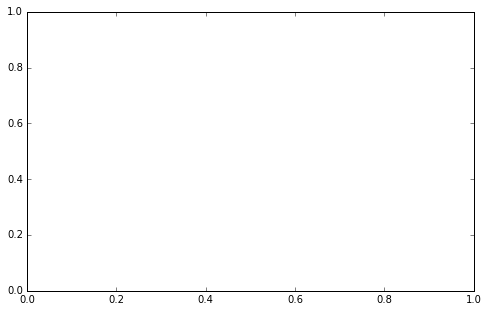

In [5]:
# edge proportion in three data base when p=0.001
datasets = ["fdu2009","fdu2013","fdu2014"]
er = {"fdu2013":{"e0":2.000,"r0":0.106},
      "fdu2014":{"e0":2.000,"r0":0.0834083},
      "fdu2009":{"e0":1.585,"r0":0.069507},
      "usc2006":{"e0":2.322,"r0":0.0119012}}
result = [[]]*3
outdata = {}
i = 0
for dataset in datasets:
    e0 = er[dataset]["e0"]
    r0 = er[dataset]["r0"]
    temp = {"fs":0,"ir":0,"f":0,"s":0}
    fr = open(datapath + "%s\\classification\\dyad_type2_all_%s_%.3f_%.3f.txt" % (dataset, dataset, e0, r0))
    line = fr.readline().replace("\n","")
    count = 0
    while line:
        count += 1
        if count%1000000==0:
            print count
        typei = line.split("\t")[1]
        temp[typei] += 1 
        line = fr.readline().replace("\n","")
    fr.close()
    outdata[dataset] = {"fs":temp["fs"],"ir":temp["ir"], "f":temp["f"], "s":temp["s"]}
    result[i]=list(np.array([0, temp["fs"], temp["ir"], temp["f"], temp["s"]])/float(np.array([temp["fs"], temp["ir"], temp["f"], temp["s"]]).sum()))
    i += 1
tofile = json.dumps(outdata)
fw = open(datapath+"drawing\\type_proportion2.json","w")
fw.write(tofile)
fw.close()
result = np.array(zip(*result))
colors = ["b","g","r","c"]
types = ["fs","ir","f","s"]
plt.figure(figsize=(8,5))
ind = [1,2,3]
width = 0.5
for i in range(1,len(result)):
    bo = result[0]
    for j in range(1,i):
        bo = bo+result[j]
    plt.bar(np.array(ind)+width/2, result[i], width, bottom = bo, color=colors[i-1], label=types[i-1])
plt.xticks(np.array(ind) + width, datasets)
plt.xlim(1,5)
plt.legend()
plt.xlabel("dataset",fontsize=16)
plt.ylabel("proportion of each type of edges", fontsize=16)
plt.show()

k=85.798254 + 146.138166
k=12.208981 + 14.426624
k=3282.849204 + 850.060844
k=1931.553101 + 879.047581


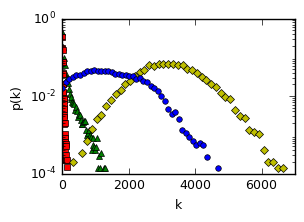

In [3]:
## degree dictribution
dataset = "sjtuecard"
er = {"fdu2013":{"e0":2.000,"r0":0.106},
      "fdu2014":{"e0":2.000,"r0":0.0834083},
      "fdu2009":{"e0":1.585,"r0":0.069507},
      "usc2006":{"e0":1.585,"r0":0.002},
      "gowalla":{"e0":1.000,"r0":0.0004735},
      "sjtuecard":{"e0":2.322,"r0":0.008}}
e0 = er[dataset]["e0"]
r0 = er[dataset]["r0"]
types = [["ir"],["f"],["s"],["fs"]]
# types = [["s"]]
colors = ["g","r","y","b"]
markers = ["^","s","D","o"]
# types = [["ir","fs","f","s"]]
# fig = plt.figure(figsize=(2,1.6))
fig = plt.figure(figsize=(3,2))
ax = plt.subplot(111)
ci=0
k = []
for typei in types:
    fr = open(datapath+"%s\\K\\%.3f_%.3f_%s_2.json" % (dataset, e0, r0, "+".join(typei)),'r')
    k = []
    for x in json.load(fr):
        if typei[0]=="s0":
            if x[1]<336:
                if random.random()<(x[1]/336.0)**1:   # fdu13:1136,0.6   usc2006: 336,1
                    k.append(x[1])
            else:
                k.append(x[1])
        else:
            k.append(x[1])
    fr.close()
    weights = np.ones_like(k)/float(len(k))
    n,bins = np.histogram(k, bins=50, weights=weights)
    if typei[0] == "fs":
        plt.semilogy(bins[:-6],n[5:], markers[ci], label="+".join(typei), markersize=4, color = colors[ci])
    else:
        plt.semilogy(bins[:-1],n, markers[ci], label="+".join(typei), markersize=4, color = colors[ci])
    print "k=%f + %f"%(np.mean(np.array(k)), np.std(np.array(k)))
    ci += 1
plt.xlabel("k", fontsize=9)
plt.ylabel("p(k)",fontsize=9)
plt.xticks([0,2000,4000,6000])
plt.xlim(0,7000)
plt.ylim(1e-4,1)
plt.yticks([1e-4,1e-2,1])
# plt.legend(fontsize=7)
axis = ax.xaxis
for label in axis.get_ticklabels():
    label.set_fontsize(9)
axis = ax.yaxis
for label in axis.get_ticklabels():
    label.set_fontsize(9)
plt.show()

k=129.138489 + 101.537667
k=516.463107 + 340.130201


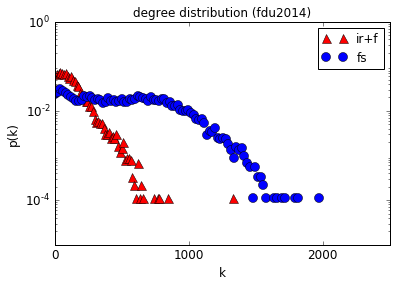

In [167]:
## degree distribbution2 (several types)
dataset = "fdu2014"
er = {"fdu2013":{"e0":2.000,"r0":0.106},
      "fdu2014":{"e0":2.000,"r0":0.0834083},
      "fdu2009":{"e0":1.585,"r0":0.069507},
      "usc2006":{"e0":2.322,"r0":0.0119012}}
e0 = er[dataset]["e0"]
r0 = er[dataset]["r0"]
types = [["ir", "f"],["fs"]]
colors = ["r","b"]
markers = ["^","o"]
fig = plt.figure()
ax = plt.subplot(111)
ci=0
for typei in types:
    k = {}
    for typeii in typei:
        fr = open(datapath+"%s\\K\\%.3f_%.3f_%s_2.json" % (dataset, e0, r0, typeii))
        for x in json.load(fr):
            k[x[0]] = k.get(x[0],0)+x[1]
        fr.close()
    k = [k[xi] for xi in k]
    weights = np.ones_like(k)/float(len(k))
    n,bins = np.histogram(k, bins=100, weights=weights)
    plt.semilogy(bins[:-1],n, markers[ci], label="+".join(typei), markersize=9, color = colors[ci])
    print "k=%f + %f"%(np.mean(np.array(k)), np.std(np.array(k)))
    ci += 1
plt.xlabel("k", fontsize=12)
plt.ylabel("p(k)",fontsize=12)
plt.xticks([0,1000, 2000])
plt.xlim(0,2500)
plt.ylim(1e-5,1)
plt.yticks([1e-4,1e-2,1])
plt.legend(fontsize=12)
axis = ax.xaxis
for label in axis.get_ticklabels():
    label.set_fontsize(12)
axis = ax.yaxis
for label in axis.get_ticklabels():
    label.set_fontsize(12)
plt.title("degree distribution (fdu2014)")
plt.show()

In [22]:
## frequency distribution (PDF and CCDF)
dataset = "sjtuecard"
er = {"fdu2013":{"e0":2.000,"r0":0.106},
      "fdu2014":{"e0":2.000,"r0":0.0834083},
      "fdu2009":{"e0":1.585,"r0":0.069507},
      "usc2006":{"e0":1.585,"r0":0.002},
      "gowalla":{"e0":1.000,"r0":0.0004735},
      "sjtuecard":{"e0":2.322,"r0":0.008}}

e0 = er[dataset]["e0"]
r0 = er[dataset]["r0"]
fr = open(datapath + "%s\\classification\\dyad_type2_all_%s_%.3f_%.3f.txt" % (dataset, dataset, e0, r0))
line = fr.readline().replace("\n","")

dyadtype = {}
count = 0
while line:
    count += 1
    if count%1000000 == 0:
        print "dyadtype:",count
    ids, types = line.split("\t")
    if random.random()<0.2:
        dyadtype[ids] = types
    line = fr.readline().replace("\n","")
fr.close()

fr = open(datapath + "%s\\basic\\dyad_e_r_t_l_w_all_%s.txt" %(dataset,dataset),'r')
edgeweight = {"fs":[],"ir":[],"s":[],"f":[]}
linei = fr.readline().replace("\n","")
count = 0
while linei:
    count += 1
    if count %1000000 == 0:
        print count
    splits = linei.split("\t")
    if not dyadtype.get(splits[0]):
        linei = fr.readline().replace("\n","")
        continue
    edgeweight[dyadtype.get(splits[0])].append(int(splits[3]))
    linei = fr.readline().replace("\n","")
fr.close()


types = [["ir"],["f"],["s"],["fs"]]
colors = ["g","r","y","b"]
markers = ["-^","-s","-D","-o"]
fig = plt.figure(figsize=(1,2.5))
ci=0
for typei in types:
    k = []
    for typeii in typei:
        k = k+edgeweight[typeii]
#     mm = np.array(k).mean()
#     k = np.array(k)/mm
    weights = np.ones_like(k)/float(len(k))
    n,bins = np.histogram(k, range(0,max(k)), weights=weights)
#     n,bins = np.histogram(k,40, weights=weights)
    
    ax = plt.subplot(111)
    ax.loglog(bins[:-1],n,markers[ci], label="+".join(typei), color=colors[ci],markersize=4)
#     x = [10,20,30,50,100,200,500,1000]
#     y = [40000*(xi**-4.4) for xi in x]
    ax.set_xlabel("f", fontsize=12)
    ax.set_yticks([1e-6,1e-4,1e-2,1])
    ax.set_xticks([1,10,1e2])
    ax.set_xlim(0.8,300)
    ax.set_ylim(1e-6,1)
    ax.set_ylabel("p(f)",fontsize=12)
#     plt.legend(fontsize=12, loc="lower left")
    axis = ax.xaxis
    for label in axis.get_ticklabels():
        label.set_fontsize(9)
    axis = ax.yaxis
    for label in axis.get_ticklabels():
        label.set_fontsize(9)
    plt.title("interaction frequency(usc2006)")

#     ax = plt.subplot(111)
#     nn = list(n)
#     nn.reverse()
#     nn = list(np.cumsum(nn))
#     nn.reverse()
#     ax.semilogx(bins[:-2],nn[1:],markers[ci], label="+".join(typei), color=colors[ci],markersize=4)
#     ax.set_xlabel("f", fontsize=10)
# #     ax.set_yticks([1e-4,1e-2,1])
#     ax.set_xticks([1,10,100,1000])
#     ax.set_xlim(0,300)
#     ax.set_ylim(0,1)
#     ax.set_ylabel("p(f)",fontsize=10)
#     axis = ax.xaxis
#     for label in axis.get_ticklabels():
#         label.set_fontsize(9)
#     axis = ax.yaxis
#     for label in axis.get_ticklabels():
#         label.set_fontsize(9)
#     plt.legend(fontsize=12)
    
    ci += 1
plt.show()

dyadtype: 1000000
dyadtype: 2000000
dyadtype: 3000000
dyadtype: 4000000
dyadtype: 5000000
dyadtype: 6000000
dyadtype: 7000000
dyadtype: 8000000
dyadtype: 9000000
dyadtype: 10000000
dyadtype: 11000000
dyadtype: 12000000
dyadtype: 13000000
dyadtype: 14000000
dyadtype: 15000000
dyadtype: 16000000
dyadtype: 17000000
dyadtype: 18000000
dyadtype: 19000000
dyadtype: 20000000
dyadtype: 21000000
dyadtype: 22000000
dyadtype: 23000000
dyadtype: 24000000
dyadtype: 25000000
dyadtype: 26000000
dyadtype: 27000000
dyadtype: 28000000
dyadtype: 29000000
dyadtype: 30000000
dyadtype: 31000000
dyadtype: 32000000
dyadtype: 33000000
dyadtype: 34000000
dyadtype: 35000000
dyadtype: 36000000
dyadtype: 37000000
dyadtype: 38000000
dyadtype: 39000000
1000000
2000000
3000000
4000000
5000000
6000000
7000000
8000000
9000000
10000000
11000000
12000000
13000000
14000000
15000000
16000000
17000000
18000000
19000000
20000000
21000000
22000000
23000000
24000000
25000000
26000000
27000000
28000000
29000000
30000000
3100000

1000000
2000000
3000000
4000000
5000000
6000000
7000000
8000000
9000000
10000000
11000000


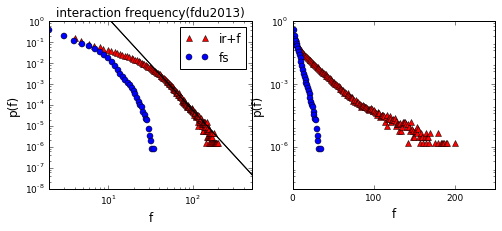

In [45]:
## frequency distribution (loglog and semilog)
dataset = "fdu2013"
er = {"fdu2013":{"e0":2.000,"r0":0.106},
      "fdu2014":{"e0":2.000,"r0":0.0834083},
      "fdu2009":{"e0":1.585,"r0":0.069507},
      "usc2006":{"e0":2.322,"r0":0.0119012}}
e0 = er[dataset]["e0"]
r0 = er[dataset]["r0"]
fr = open(datapath + "%s\\classification\\dyad_type2_all_%s_%.3f_%.3f.txt" % (dataset, dataset, e0, r0))
line = fr.readline().replace("\n","")

dyadtype = {}
count = 0
while line:
    id, type = line.split("\t")
    dyadtype[id] = type
    line = fr.readline().replace("\n","")
fr.close()

fr = open(datapath + "%s\\basic\\dyad_e_r_t_l_w_all_%s.txt" %(dataset,dataset),'r')
edgeweight = {"fs":[],"ir":[],"s":[],"f":[]}
linei = fr.readline().replace("\n","")
count = 0
while linei:
    count += 1
    if count %1000000 == 0:
        print count
    splits = linei.split("\t")
    if not dyadtype.get(splits[0]):
        linei = fr.readline().replace("\n","")
        continue
    edgeweight[dyadtype.get(splits[0])].append(int(splits[3]))
    linei = fr.readline().replace("\n","")
fr.close()

types = [["ir","f"],["fs"]]
colors = ["r","b"]
markers = ["^","o"]
fig = plt.figure(figsize=(8,3))
ax = plt.subplot(121)
ci=0
for typei in types:
    k = []
    for typeii in typei:
        k = k+edgeweight[typeii]
    weights = np.ones_like(k)/float(len(k))
    n,bins = np.histogram(k, bins=500, weights=weights)
    ax = plt.subplot(121)
    ax.loglog(bins[:-1],n,markers[ci], label="+".join(typei), color=colors[ci],markersize=6)
    x = [10,20,30,50,100,200,500,1000]
    y = [35000*(xi**-4.4) for xi in x]
    ax.set_xlabel("f", fontsize=12)
    ax.set_yticks([1e-6,1e-3,1])
    ax.set_xticks([1,10,1e2,1e3])
    ax.set_xlim(0,500)
    ax.set_ylim(1e-8,1)
    ax.set_ylabel("p(f)",fontsize=12)
    plt.legend(fontsize=12)
    axis = ax.xaxis
    for label in axis.get_ticklabels():
        label.set_fontsize(9)
    axis = ax.yaxis
    for label in axis.get_ticklabels():
        label.set_fontsize(9)
    plt.title("interaction frequency(fdu2013)")
    
    ax.loglog(x,y,"k-")
    ax = plt.subplot(122)
    ax.semilogy(bins[:-1],n,markers[ci], label="+".join(typei), color=colors[ci],markersize=6)
    ax.set_xlabel("f", fontsize=12)
    ax.set_yticks([1e-6,1e-3,1])
    ax.set_xticks([0,100,200,300])
    ax.set_xlim(0,250)
    ax.set_ylim(1e-8,1)
    ax.set_ylabel("p(f)",fontsize=12)
    axis = ax.xaxis
    for label in axis.get_ticklabels():
        label.set_fontsize(9)
    axis = ax.yaxis
    for label in axis.get_ticklabels():
        label.set_fontsize(9)
    ci += 1
plt.show()

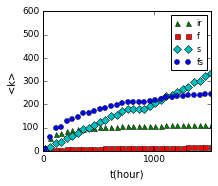

In [10]:
## aggregate degree distribution (evolution)
dataset = "usc2006"
er = {"fdu2013":{"e0":2.000,"r0":0.106},
      "fdu2014":{"e0":2.000,"r0":0.0834083},
      "fdu2009":{"e0":1.585,"r0":0.069507},
      "usc2006":{"e0":1.585,"r0":0.002},
      "gowalla":{"e0":1.000,"r0":0.0004735},
      "sjtuecard":{"e0":2.322,"r0":0.008}}
e0 = er[dataset]["e0"]
r0 = er[dataset]["r0"]
types = ["ir","f","s","fs"]
colors = ["g","r","c","b"]
markers = ["^","s","D","o"]
fig = plt.figure(figsize=(3,2.5))
ax = plt.subplot(111)
ci=0
for typei in types:
    k = json.load(open(datapath+"%s\\K\\aggreK_evolution2_%.3f_%.3f.json" % (dataset, e0, r0),'r'))[typei]
    k = sorted(k.iteritems(),key=lambda d:int(d[0]))
    a = [x[0] for x in k[10:]]
    b = [x[1][0] for x in k[10:]]
#     p = sp.polyfit(a,b,4)
#     x = np.array(range(0,4200))
#     fx = sp.polyval(p,x)
    ax.plot(a[0:len(a):50],b[0:len(b):50],markers[ci],color=colors[ci],label=typei, markersize=5)
#     plt.plot(x,fx,'-',color="black")
    ci += 1
ax.set_xlabel("t(hour)", fontsize=10)
ax.set_ylabel("<k>",fontsize=10)
ax.set_xticks([0, 1000,2000,3000,4000])
# plt.title("degree distribution of each type",fontsize=16)
plt.xlim(0,1512)
plt.ylim(0,600)
axbox = ax.get_position()
plt.legend(loc=(axbox.x0+0.65, axbox.y0+0.02),fontsize=8)
plt.legend(loc="upper right",fontsize=8)
axis = ax.xaxis
for label in axis.get_ticklabels():
    label.set_fontsize(9)
axis = ax.yaxis
for label in axis.get_ticklabels():
    label.set_fontsize(9)
plt.show()

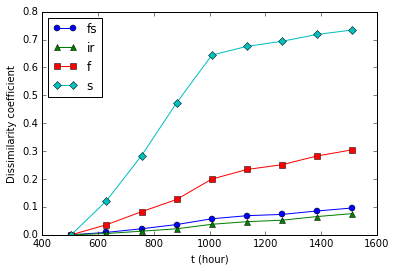

In [4]:
## degree rank evolution
from scipy import stats
dataset = "usc2006"
er = {"fdu2013":{"e0":2.000,"r0":0.106},
      "fdu2014":{"e0":2.000,"r0":0.0834083},
      "fdu2009":{"e0":1.585,"r0":0.069507},
      "usc2006":{"e0":2.322,"r0":0.0119012}}
e0 = er[dataset]["e0"]
r0 = er[dataset]["r0"]
types = ["fs","ir","f","s"]
c = {"fs":"-bo","ir":"-g^","f":"-rs","s":"-cD"}
degree_rank = json.load(open(datapath+"%s\\K\\rankK_evolution.json"%dataset))
nodelist = [str(int(x)) for x in json.load(open(datapath+"%s\\basic\\userlist_%s.json"%(dataset,dataset)))]
spearman_rank = {}
for typei in types:
    spearman_rank[typei] = []
initial_rank = {}
for typei in types:
    initial_rank[typei] = [degree_rank[str(0)][typei].get(x,0) for x in nodelist]
for ti in range(504+126, 1512+1, 126):
    for typei in types:
        temprank = [degree_rank[str(ti)][typei].get(x,0) for x in nodelist]
        r = stats.spearmanr(initial_rank[typei], temprank)
        spearman_rank[typei].append(r[0])

plt.figure()
x = range(504, 1512+1, 126)
for typei in types:
    y = [1]+spearman_rank[typei]
    yy = [(1-yi*yi) for yi in y]
    plt.plot(x, yy, c[typei], label=typei)
plt.legend(loc="upper left")
plt.xlabel("t (hour)")
plt.ylabel("Dissimilarity coefficient")
plt.show()

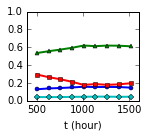

In [64]:
## ecnounter frequency f evolution
dataset = "fdu2013"
fig = plt.figure(figsize = (2,1.6))
ax = plt.subplot(111)
avrgf = json.load(open(datapath+"%s\\averageEdgeWeight\\avrgf_evolution.json"%dataset))
types = ["fs","ir","f","s"]
c = {"fs":"-bo","ir":"-g^","f":"-rs","s":"-cD"}
x = range(504, 1512+1, 126)
for typei in types:
    y = [avrgf[str(xi)][typei] for xi in x]
    ax.plot(x, y, c[typei], label=typei, markersize=4, linewidth=2)
ax.set_xlabel("t (hour)")
ax.set_xticks([500,1000,1500])
ax.set_yticks([0,0.2,0.4,0.6,0.8,1])
ax.set_ylim(0,1)
plt.show()

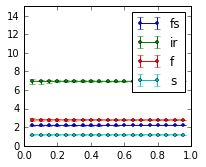

In [62]:
## frequency (sample proportion evolution)
dataset = "fdu2013"
fig = plt.figure(figsize = (3,2.5))
ax = plt.subplot(111)
avrgf = json.load(open(datapath+"%s\\averageEdgeWeight\\sample_avrgf.json"%dataset))
types = ["fs","ir","f","s"]
props = {"fs":dict(linewidth=3,color='b'),
         "ir":dict(linewidth=3,color='g'),
         "f":dict(linewidth=3,color='r'),
         "s":dict(linewidth=3,color='c')}
x = np.linspace(0.05,0.95,19)
for typei in types:
    y = [np.mean(avrgf[str(xi)][typei]) for xi in x]
    uppererror = np.array([np.min(avrgf[str(xi)][typei]) for xi in x])-np.array(y)
    lowererror = np.array(y)-np.array([np.max(avrgf[str(xi)][typei]) for xi in x])
    yerror = [lowererror,uppererror]
    ax.errorbar(x,y,yerr=yerror, fmt='-o', label=typei, markersize=3)
ax.legend(loc="upper right")
ax.set_ylim(0,15)
plt.show()

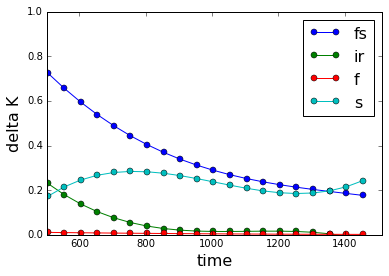

In [51]:
## delta k of aggreK (evulotion)
dataset = "fdu2014"
e0 = 2.000#2.000 #1.585 #2.322  # 2.000
r0 = 0.0834083#0.106 #0.069507 #0.0119012  # 0.0834083
types = ["fs","ir","f","s"]
colors = ["b","g","r","c"]
ci = 0
for typei in types:
    k = json.load(open(datapath+"%s\\K\\aggreK_evolution_%.3f_%.3f_%s.json" % (dataset, e0, r0, typei),'r'))[typei]
    k = sorted(k.iteritems(),key=lambda d:int(d[0]))
    a = [int(x[0]) for x in k]
    b = [x[1] for x in k]
    p = sp.polyfit(a,b,4)
    x = np.array(range(504,1512))
    fx = sp.polyval(p,x)
    delta = 50
    xx = []
    yy = []
    for i in range(len(x)/delta):
        xx.append(x[i*delta])
        yy.append((fx[(i+1)*delta]-fx[i*delta])/float(100))
    plt.plot(xx,yy,'-o',label=typei, color=colors[ci])
    ci += 1
plt.xlabel("time", fontsize=16)
plt.ylabel("delta K",fontsize=16)
plt.legend(fontsize=16)
plt.xlim(503,1512)
plt.ylim(0,1.0)
# plt.title("delta K",fontsize=16)
plt.show()

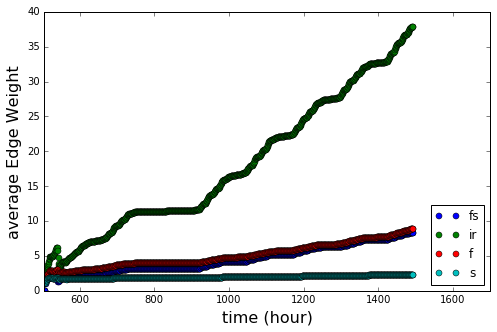

In [294]:
## average edge weight
dataset = "usc2006"
e0 = 2.322 #2.000 #1.585 #2.322  # 2.000
r0 = 0.0119012 #0.106 #0.069507 #0.0119012  # 0.0834083
types = ["fs","ir","f","s"]
colors = ["b","g","r","c"]
plt.figure(figsize=(8,5))
ci=0
for typei in types:
    k = json.load(open(datapath+"%s\\averageEdgeWeight\\%.3f_%.3f_%s.json" % (dataset, e0, r0, typei),'r'))
    k = sorted(k.iteritems(),key=lambda d:int(d[0]))
    a = [int(x[0]) for x in k]
    b = [x[1] for x in k]
    plt.plot(a,b,'o',color=colors[ci],label=typei)
    ci += 1
plt.xlabel("time (hour)", fontsize=16)
plt.ylabel("average Edge Weight",fontsize=16)
plt.legend(fontsize=16)
# plt.title("degree distribution of each type",fontsize=16)
plt.xlim(504,1700)
plt.ylim(0,40)
plt.legend(loc='lower right')
plt.show()

In [4]:
## clustering coefficient (one period)
dataset = "fdu2013"
e0 = 2.000#2.000 #1.585 #2.322  # 2.000
r0 = 0.0834083#0.106 #0.069507 #0.0119012  # 0.0834083
types = ["fs","ir","f","s"]
colors = ["b","g","r","c"]
cc = json.load(open(datapath+"%s\\clustering\\oneperiod_%.3f_%.3f.json"%(dataset, e0, r0)))
fi=0
for ti in types:
    fi+=1
    plt.plot(range(cc[ti]), cc[ti], color=colors[fi-1], linewidth=3)
plt.show()

IOError: [Errno 2] No such file or directory: 'F:\\master\\myWork\\18familiarStrangers\\data\\fdu2013\\clustering\\oneperiod_2.000_0.083.json'

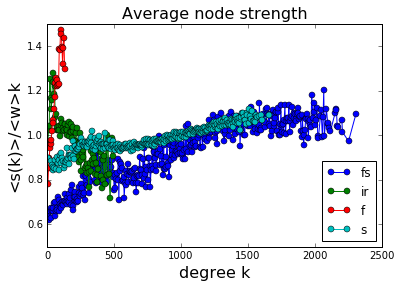

In [170]:
## average node strength
dataset = "fdu2014"
e0 = 2.000#2.000 #1.585 #2.322  # 2.000
r0 = 0.0834083#0.106 #0.069507 #0.0119012  # 0.0834083
types = [["fs"],["ir"],["f"],["s"]]
colors = ["b","g","r","c"]
ci = 0
for typei in types:
    k_w = json.load(open(datapath+"%s\\averageNodeStrength\\%.3f_%.3f_%s_t.json" % (dataset,e0,r0,"+".join(typei))), 'r')
    interval = 5
    diction = {}
    for x in k_w:
        if diction.has_key(x[0]/interval):
            diction[x[0]/interval].append([x[1],x[0]])
        else:
            diction[x[0]/interval]=[[x[1],x[0]]]
    a = []
    b = []
    w_total = 0
    k_total = 0
    for ki in diction:
        for x in diction[ki]:
            w_total = w_total + x[0]
            k_total = k_total + x[1]
    w_avrg = w_total/float(k_total)
    for ki in diction.keys():
        if len(diction[ki]) < 5:
            continue
        if (ki-1)*interval<0:
            continue
        a.append(ki*interval)
        s_avrg = np.array([x[0] for x in diction[ki]]).mean() 
        k_avrg = np.array([x[1] for x in diction[ki]]).mean() 
        b.append(s_avrg/k_avrg/float(w_avrg))
    plt.plot(a,b,"-o",label="+".join(typei), color=colors[ci])
    ci += 1
#     sns.regplot(np.array(a),np.array(b), label="+".join(typei))
plt.ylabel("<s(k)>/<w>k",fontsize = 16)
plt.xlabel("degree k", fontsize = 16)
plt.xlim(0,2500)
plt.ylim(0.5,1.5)
plt.legend(fontsize = 16)
plt.title("Average node strength",fontsize = 16)
plt.legend(loc="lower right")
plt.show()

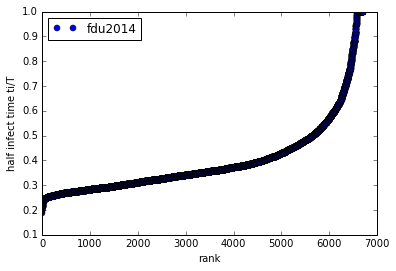

In [23]:
## node heterogeous ---- half infect time
nodeN = {"fdu2013":10146, "fdu2014":9028, "fdu2009":6003, "usc2006":5185}
beta = 0.005
f = 0
start = 504
stop = 1512
tN = stop-start
SIscale = json.load( \
            open(datapath+"%s\\spreadingResult\\targetImmune\\scale\\%s_%s_%s.json"%(dataset,beta,0,"SI")))
for dataset in ["fdu2014"]:
    harfT_SI = {}  
    for ni in SIscale:
        for i in range(0,tN):
            if SIscale[ni][i] >= nodeN[dataset]*(1-f)*0.5:
                harfT_SI[ni] = i
                break
            harfT_SI[ni] = tN
    harfT_SI = sorted(harfT_SI.iteritems(), key=lambda d:d[1])
    y = [xi[1]/float(tN) for xi in harfT_SI]
    plt.plot(range(len(y)), y,"o", label=dataset)
plt.legend(loc="upper left")
plt.xlabel("rank")
plt.ylabel("half infect time ti/T")
plt.show()


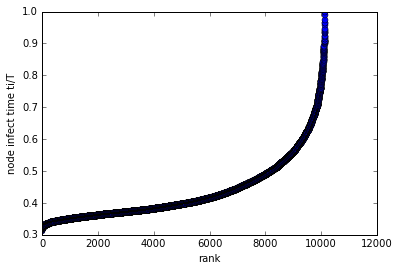

In [22]:
## node heterogeous ---- node infected time
dataset = "fdu2014"
nodeN = {"fdu2013":10146, "fdu2014":9028, "fdu2009":6003, "usc2006":5185}
timespans = {"fdu2013":{0.002:1008,0.005:1008,0.01:504,0.02:504,0.05:504,0.1:252,0.2:252,0.5:252,1.0:252},
            "fdu2014":{0.002:1008,0.005:1008,0.01:504,0.02:504,0.05:504,0.1:1008,0.2:1008,0.5:1008,1.0:1008},
            "fdu2009":{0.002:1008,0.005:1008,0.01:1008,0.02:1008,0.05:1008,0.1:1008,0.2:1008,0.5:1008,1.0:1008},
            "usc2006":{0.002:1008,0.005:1008,0.01:1008,0.02:1008,0.05:1008,0.1:1008,0.2:1008,0.5:1008,1.0:1008}}
beta = 0.005
start = 504
stop = 1512
tN = stop-start
timespan = timespans[dataset][beta]
nodeInfectTime = json.load(open(datapath + "%s\\spreadingResult\\SI\\nodeInfectTime\\temporalNetwork_1hours_%s_%s_time.json"%(dataset,beta, timespan)))
temp = {}  
for ni in nodeInfectTime:
    temp[ni] = nodeInfectTime[ni][0]
temp = sorted(temp.iteritems(), key=lambda d:d[1])
y = [xi[1]/float(tN) for xi in temp]
plt.plot(range(len(y)), y,"o")
plt.xlabel("rank")
plt.ylabel("node infect time ti/T")
plt.show()

average IET:
fs : 3.27632158016
average IET:
ir+f : 3.30396481974
average IET:
s : 4.49640178592


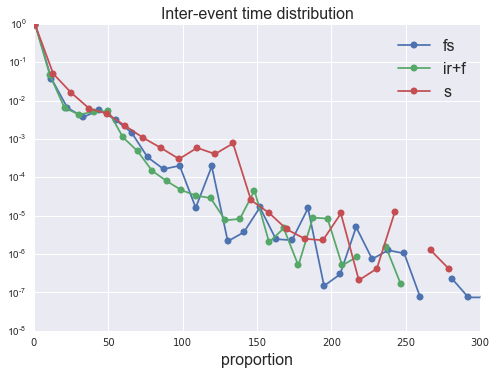

In [190]:
## IET distribution for each type
dataset = "fdu2009"
types = [["fs"],["ir","f"],["s"]]
for typei in types:
    samplerate = 0.05
    filename = datapath+"%s\\IET\\IET_%s_%s.json" % (dataset, "+".join(typei),samplerate)
    iet = json.load(open(filename,'r'))
    IET = []
    print "average IET:"
    for keyi,v in iet.items():
        IET = IET + [int(keyi)]*v
    print "+".join(typei), ":", np.array(IET).mean()
    weights = np.ones_like(IET)/float(len(IET))
    n,bins = np.histogram(IET, bins=50,weights=weights)
    plt.semilogy(bins[:-1],n,'-o', label="+".join(typei))
plt.legend(fontsize=16)
plt.xlabel("inter-event time",fontsize=16)
plt.xlabel("proportion",fontsize=16)
plt.title("Inter-event time distribution",fontsize=16)
plt.xlim(0,300)
plt.show()



1000000
2000000
3000000
4000000
5000000
6000000
7000000
8000000
9000000
10000000
11000000
12000000
13000000
14000000
15000000
16000000


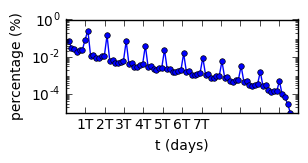

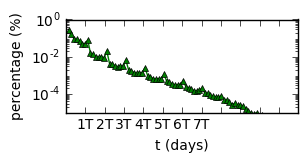

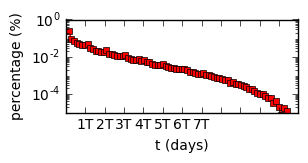

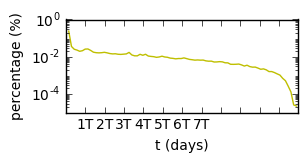

In [5]:
## ICT distribution for each type (t=7days)
dataset = "fdu2013"
er = {"fdu2013":{"e0":2.000,"r0":0.106},
      "fdu2014":{"e0":2.000,"r0":0.0834083},
      "fdu2009":{"e0":1.585,"r0":0.069507},
      "usc2006":{"e0":1.585,"r0":0.002},
     "sjtuecard":{"e0":2.322,"r0":0.008}}
e0 = er[dataset]["e0"]
r0 = er[dataset]["r0"]
tt = "slot"
ttname = str(tt)+ ""
types = ["fs","ir","f","s"]
colors = ["-ob","-^g","-sr","-y"]
ci = 0

ict = {"fs":[],"ir":[],"s":[],"f":[]}
fr = open(datapath+"%s\\ICT\\%.3f_%.3f_%s.txt"%(dataset, e0, r0, ttname))
lines = fr.read().splitlines()
count = 0
for e in lines:
    count += 1
    if count%1000000==0:
        print count
    splits = e.split("\t")
    ict[splits[1]].append(int(splits[0]))
fr.close()


fi = 0
for typei in types:
    fi += 1
    if typei in ["fs","ir","f","s"]:
        plt.figure(figsize=(3,1.2))
    series = ict[typei]
    weight = np.ones_like(series)/float(len(series))
    [n,bins] = np.histogram(series, bins = 84, weights = weight)
    
    if typei in ["f"]:
        plt.semilogy(bins[1:],n,colors[fi-1],label=typei,markersize=4)
        labels = ['1T','2T','3T','4T','5T','6T','7T']
        plt.xticks(range(168,2160,168), labels)
        plt.xlabel("t (days)")
    else:
        plt.semilogy(bins[1:],n,colors[fi-1],label=typei, markersize=4)
        labels = ['1T','2T','3T','4T','5T','6T','7T']
        plt.xticks(range(168,2160,168), labels)
        plt.xlabel("t (days)")
    plt.xlim(0,12*168+1)
    plt.ylim(1e-5,1)
    plt.yticks([1e-4,1e-2,1])
#     plt.legend(loc="lower right")
    plt.ylabel("percentage (%)")
plt.show()

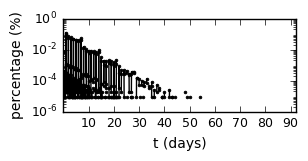

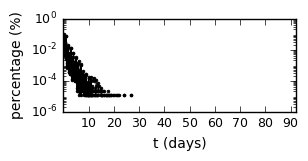

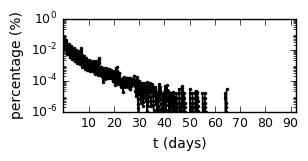

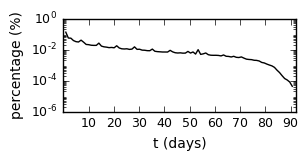

In [6]:
# ICT distribution for each type (T=24h)
dataset = "sjtuecard"
e0 = 2.322#2.000 #1.585 #2.322  # 2.000
r0 = 0.008#0.106 #0.069507 #0.0119012  # 0.0834083
types = ["fs","ir","f","s"]
# colors = ["-ob","-^g","-sr","-y"]
colors = ["-ok","-ok","-ok","-k"]
ci = 0
maxtime = 2208 # hour
tt = "0"
ttname = str(tt)+ ""


ict = {"fs":[],"ir":[],"s":[],"f":[]}
fr = open(datapath+"%s\\ICT\\%.3f_%.3f_%s.txt"%(dataset, e0, r0, ttname))
types = ["fs","s", "ir", "f"]
lines = fr.read().splitlines()
count = 0
for e in lines:
    count += 1
    if count%10000000==0:
        print count
    splits = e.split("\t")
    if splits[1] in types:
        a = int(splits[0])
        if a <= maxtime:
            ict[splits[1]].append(int(splits[0]))
fr.close()

# tt = 0
# ttname = str(tt)+ ""
# fr = open(datapath+"%s\\ICT\\%.3f_%.3f_%s.txt"%(dataset, e0, r0, ttname))
# types = ["ir","f"]
# lines = fr.read().splitlines()
# count = 0
# for e in lines:
#     count += 1
#     if count%1000000==0:
#         print count
#     splits = e.split("\t")
#     if splits[1] in types:
#         a = int(splits[0])
#         if a <= maxtime:
#             ict[splits[1]].append(int(splits[0]))
# fr.close()


fi = 0
types = ["fs","ir","f","s"]
for typei in types:
    fi += 1
    if typei in ["fs","ir","f","s"]:
        if typei == "s":
            plt.figure(figsize=(3,1.2))
        else:
            plt.figure(figsize=(3,1.2))
    series = ict[typei]
    weight = np.ones_like(series)/float(len(series))
    [n,bins] = np.histogram(series, bins =(max(series)-min(series)), weights = weight) # max(series)-min(series)
    if typei in ["f"]:
        [n,bins] = np.histogram(series, bins =(max(series)-min(series))/2, weights = weight) # max(series)-min(series)
        timewin = 3
        for i in range(3,len(n)-timewin/2):
            n[i] = np.mean(n[i-timewin/2:i+timewin/2])
        plt.semilogy(bins[1:],n,colors[fi-1],label=typei,markersize=2)
    elif typei in ["s"]:
        [n,bins] = np.histogram(series, bins =(max(series)-min(series))/24, weights = weight) # max(series)-min(series)
#         timewin = 2
#         for i in range(2,len(n)-timewin/2):
#             n[i] = np.mean(n[i-timewin/2:i+timewin/2])
        plt.semilogy(bins[1:],n,colors[fi-1],label=typei,markersize=3)
    else:
        [n,bins] = np.histogram(series, bins =(max(series)-min(series))/1, weights = weight) # max(series)-min(series)
        plt.semilogy(bins[1:],n,colors[fi-1],label=typei, markersize=2)
    labels = ['10','20','30','40','50','60','70','80','90']
    plt.xticks(range(240,2208,240), labels, fontsize=9)
#     labels = ['1','2','3','4','5','6','7','8']
#     plt.xticks(range(24,9*24,24), labels, fontsize=9)
    plt.xlabel("t (days)")
    plt.xlim(0,92*24)
    plt.ylim(1e-6,1)
    plt.yticks([1e-6,1e-4,1e-2,1], fontsize=9)
#     plt.legend(loc="lower left")
    plt.ylabel("percentage (%)")
plt.show()

In [40]:
#fit ict of fs
dataset = "sjtuecard" 
er = {"fdu2013":{"e0":2.000,"r0":0.106},
      "fdu2014":{"e0":2.000,"r0":0.0834083},
      "fdu2009":{"e0":1.585,"r0":0.069507},
      "usc2006":{"e0":1.585,"r0":0.002},
      "gowalla":{"e0":1.000,"r0":0.0004735},
      "sjtuecard":{"e0":2.322,"r0":0.008}}
e0 = er[dataset]["e0"]
r0 = er[dataset]["r0"] 
types = ["ir"]
maxtime = 2208 # hour 
tt = "0" 
ttname = str(tt)+ ""
ict = [] 
fr = open(datapath+"%s\ICT\%.3f_%.3f_%s.txt"%(dataset, e0, r0, ttname)) 
lines = fr.read().splitlines() 
count = 0 
for e in lines: 
    count += 1 
    if count%10000000==0:
        print count 
    splits = e.split("\t") 
    if splits[1] in types: 
        a = int(splits[0]) 
        if a <= maxtime: 
            ict.append(int(splits[0])) 
fr.close()

fi = 0
maxl1 = 7
maxl2 = 45
typei = "ir" 
if typei in ["fs","ir","f","s"]: 
    plt.figure(figsize=(3,2)) 
series = ict 
weight = np.ones_like(series)/float(len(series)) 
[n,bins] = np.histogram(series, bins =range(0,24*maxl2+1,24), weights = weight) # max(series)-min(series) 
plt.semilogy(bins[2:],n[1:],"ob",label=typei, markersize=3) 
x = np.array(range(1,maxl2+1)) 
y = np.log(n[1:maxl2+1])
z = np.polyfit(x[0:maxl1],y[0:maxl1],1)
print z[0],np.exp(z[1])
plt.semilogy(x*24,np.exp(z[1])*np.exp(z[0]*x),"-k")
labels = ['10','20','30','40','50','60','70','80','90']
plt.xticks(range(240,2016,240), labels, fontsize=9)
# labels = ['1','2','3','4','5','6','7','8','10','11','12'] 
# plt.xticks(range(168,2016,168), labels, fontsize=9) 
plt.xlabel("t (days)") 
plt.xlim(0,2016) 
plt.ylim(1e-6,1) 
plt.yticks([1e-6,1e-4,1e-2,1], fontsize=9)
plt.legend(loc="upper right")
plt.ylabel("percentage (%)") 
plt.show()


-0.671790482363 0.296084668322


In [23]:
## social tie in inferring accuracy vs p0            
dataset = "fdu2013"    
p = [0.001, 0.0001, 0.00001,0.000001]
er = {"0.001":[2.000, 0.106],
      "0.0001":[2.000, 0.11111],
      "1e-05":[2.322, 0.138914],
      "1e-06":[2.322, 0.2000]}
validdyads_classmates = datapath + "%s\\socialTie_infer\\validdyads_classmates.txt"%(dataset)
validdyads_encounter = datapath + "%s\\socialTie_infer\\validdyads_encounter.txt"%(dataset)
real_classmates = {}
fr = open(validdyads_classmates)
line = fr.readline().replace("\n","")
while line:
    splits = line.split("\t")
    did = splits[0]
    e = float(splits[1])
    r = float(splits[2])
    real_classmates[did] = [e,r]
    line = fr.readline().replace("\n","")
fr.close()

result = []
for pi in p:
    e0, r0 = er[str(pi)]
    real_encounter = []
    fr = open(validdyads_encounter)
    line = fr.readline().replace("\n","")
    count = 0
    while line:
        count += 1
        if count%1000000==0:
            print pi,": ", count
        splits = line.split("\t")
        did = splits[0]
        e = float(splits[1])
        r = float(splits[2])
        if e>=e0 and r>=r0:
            real_encounter.append(did)
        line = fr.readline().replace("\n","")
    fr.close()
    accuracy = len(set(real_classmates.keys()) & set(real_encounter)) / float(len(real_encounter))
    recall = len(set(real_classmates.keys()) & set(real_encounter)) / float(len(real_classmates))
    result.append([pi, accuracy, recall])
print result
    
# eList = [x[0] for x in real_classmates.values()]
# rList = [x[1] for x in real_classmates.values()]
# x_bins = np.round(np.log2(np.array(range(1,64))),3)
# y_bins = np.linspace(0,1,8)
# weights = np.ones_like(eList)/float(len(eList))
# [a,b,c,d] = plt.hist2d(eList, rList, bins = [x_bins, y_bins], range = [[0, 7], [0, 1]], norm=LogNorm(), weights = weights)
# plt.colorbar()
# plt.xlim((0, 6))
# plt.ylim((0, 1))
# plt.xlabel("spatio-temporal entropy")
# plt.ylabel("regularity")
# plt.title("entropy_regularity distribution of classmates")
# plt.show()


all_encounter = {}
fr = open(validdyads_encounter)
line = fr.readline().replace("\n","")
while line:
    splits = line.split("\t")
    did = splits[0]
    e = float(splits[1])
    r = float(splits[2])
    all_encounter[did] = [e,r]
    line = fr.readline().replace("\n","")
fr.close()
eList = [x[0] for x in all_encounter.values()]
rList = [x[1] for x in all_encounter.values()]
x_bins = np.round(np.log2(np.array(range(1,64))),3)
y_bins = np.linspace(0,1,8)
weights = np.ones_like(eList)/float(len(eList))
[a,b,c,d] = plt.hist2d(eList, rList, bins = [x_bins, y_bins], range = [[0, 7], [0, 1]], norm=LogNorm(), weights = weights)
plt.colorbar()
plt.xlim((0, 6))
plt.ylim((0, 1))
plt.xlabel("spatio-temporal entropy")
plt.ylabel("regularity")
plt.title("entropy_regularity distribution of all dyads")
plt.show()

[[0.001, 0.7277181989797967, 0.812685027361622], [0.0001, 0.7285818005808326, 0.8102179958733291], [1e-05, 0.8532736429770565, 0.6839508387907061], [1e-06, 0.863714201358134, 0.6560958105319817]]


[[0.001, 0.42829824026040075, 0.9443347986005203], [0.0001, 0.48822762299940725, 0.9236117340988607], [1e-05, 0.7247466751108297, 0.8212972100116623], [1e-06, 0.9892424921559838, 0.09899524535749529]]


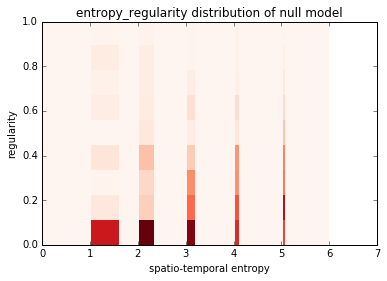

In [34]:
## social tie in inferring accuracy vs t           
dataset = "fdu2013"    
p = [0.001, 0.0001, 0.00001,0.000001]
er = {"0.001":5,
      "0.0001":6,
      "1e-05":10,
      "1e-06":45}
validdyads_classmates = datapath + "%s\\socialTie_infer\\validdyads_classmates.txt"%(dataset)
validdyads_encounter = datapath + "%s\\socialTie_infer\\validdyads_encounter.txt"%(dataset)
real_classmates = {}
fr = open(validdyads_classmates)
line = fr.readline().replace("\n","")
while line:
    splits = line.split("\t")
    did = splits[0]
    t = float(splits[3])
    r = float(splits[2])
    real_classmates[did] = [t,r]
    line = fr.readline().replace("\n","")
fr.close()

result = []
for pi in p:
    t0 = er[str(pi)]
    real_encounter = []
    fr = open(validdyads_encounter)
    line = fr.readline().replace("\n","")
    count = 0
    while line:
        count += 1
        if count%1000000==0:
            print pi,": ", count
        splits = line.split("\t")
        did = splits[0]
        t = float(splits[3])
        r = float(splits[2])
        if t>=t0:
            real_encounter.append(did)
        line = fr.readline().replace("\n","")
    fr.close()
    accuracy = len(set(real_classmates.keys()) & set(real_encounter)) / float(len(real_encounter))
    recall = len(set(real_classmates.keys()) & set(real_encounter)) / float(len(real_classmates))
    result.append([pi, accuracy, recall])
print result
    
eList = [x[0] for x in real_classmates.values()]
rList = [x[1] for x in real_classmates.values()]
x_bins = np.round(np.log2(np.array(range(1,64))),3)
y_bins = np.linspace(0,1,10)
[a,b,c,d] = plt.hist2d(eList, rList, bins = [x_bins, y_bins], range = [[0, 7], [0, 1]], cmap=plt.cm.Reds)
plt.xlim((0, 7))
plt.ylim((0, 1))
plt.xlabel("spatio-temporal entropy")
plt.ylabel("regularity")
plt.title("entropy_regularity distribution of null model")

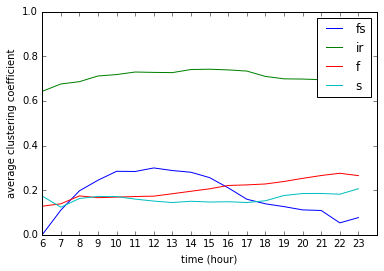

In [90]:
## draw clustering coefficient
dataset = "usc2006"
e0 = 2.322#2.000 #1.585 #2.322  # 2.000
r0 = 0.0119012#0.106 #0.069507 #0.0119012  # 0.0834083
types = ["fs","ir","f","s"]
colors = ["b","g","r","c"]
cc = json.load(open(datapath+"%s\\clustering\\oneperiod_%.3f_%.3f.json"%(dataset, e0, r0)))
ci = 0
for typei in types:
    data = cc[typei]
    if typei == "ii":
        data = []
        for i in range(len(cc[typei])):
            if i%18==0:
                data.append(0)
            else:
                data.append(cc[typei][41]+random.random()/30.0)
    plt.plot(range(len(cc[typei])),data, color=colors[ci], label=typei)
    ci += 1
plt.legend()
plt.xlabel("time (hour)")
# labels = ["Sun","Mon","Tue","Wed","Thus","Fri","Sat"]
labels = range(6,24)
plt.xticks(range(0,18,1), labels)
plt.ylabel("average clustering coefficient")
plt.ylim(0,1)
plt.xlim(0,18)
plt.show()

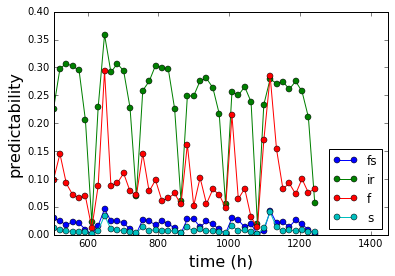

In [199]:
## predictability
dataset = "fdu2014"
e0 = 2.000#2.000 #1.585 #2.322  # 2.000
r0 = 0.0834083#0.106 #0.069507 #0.0119012  # 0.0834083
timeWname = "1day"
types = ["fs","ir","f","s"]
colors = ["b","g","r","c"]
ci = 0
for typei in types:
    pre = json.load(open(datapath+"%s\\predictability\\%.3f_%.3f_%s_%s.json"%(dataset,e0,r0,typei,timeWname)))
    a = []
    b = []
    pre = sorted(pre.iteritems(),key=lambda d:int(d[0]))
    for x in pre:
        a.append(x[0])
        b.append(x[1])
    plt.plot(a,b,'-o',color = colors[ci],label = typei)
    ci += 1
plt.legend(loc="lower right")
plt.xlim(504,1450)
plt.xlabel("time (h)",fontsize=16)
plt.ylabel("predictability", fontsize=16)
plt.show()

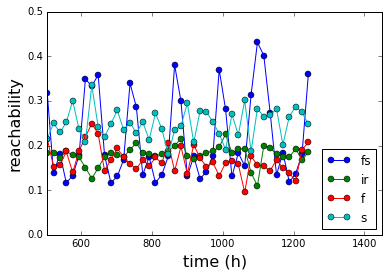

In [330]:
## reachability
dataset = "fdu2014"
e0 = 2.000 #2.000 #1.585 #2.322  # 2.000
r0 = 0.0834083#0.106 #0.069507 #0.0119012  # 0.0834083
timeWname = "3hours"
types = ["fs","ir","f","s"]
colors = ["b","g","r","c"]
ci = 0
for typei in types:
    reach = json.load(open(datapath+"%s\\reachability\\%.3f_%.3f_%s_%s_normed.json"%(dataset,e0,r0,typei,timeWname)))
    a = []
    b = []
    reach = sorted(reach.iteritems(),key=lambda d:int(d[0]))
    for x in reach:
        a.append(x[0])
        b.append(x[1])
    aa = np.zeros(len(a[0:len(a):6]))
    bb = np.zeros(len(a[0:len(a):6]))
    for i in range(0,6):
        bb = bb + np.array(b[i:len(a):6])
    plt.plot(a[0:len(a):6],bb/6.0,'-o',color = colors[ci],label = typei)
#     plt.plot(a,b,'-o',color = colors[ci],label = typei)
    ci += 1
plt.legend(loc="lower right")
plt.xlim(504,1450)
plt.ylim(0,0.5)
plt.xlabel("time (h)",fontsize=16)
plt.ylabel("reachability", fontsize=16)
plt.show()

In [ ]:
## ego-network (in gephi)
dataset = "fdu2013"
e0 = 2.000 #2.000 #1.585 #2.322  # 2.000
r0 = 0.106#0.106 #0.069507 #0.0119012  # 0.0834083

# dyadType = {}
# fr = open(datapath+"%s\\classification\\dyad_type_all_%s_%.3f_%.3f.txt" % (dataset, dataset, e0, r0))
# line = fr.readline().replace("\n","")
# count = 0
# while line:
#     count += 1
#     if count%1000000 == 0:
#         print count
#     k,v = line.split("\t")
#     dyadType[k] = v
#     line = fr.readline().replace("\n","")
# fr.close()

# timeWname = "1week"
# ti = 504
# colors = {"fs":"blue","ir":"green","f":"red","s":"cyan"}
# g = nx.Graph()
# fr = open(datapath+"%s\\temporalNetwork\\temporalNetwork_%s\\%s.txt"%(dataset,timeWname,ti))
# es = fr.read().splitlines()
# for e in es:
#     n1,n2 = e.split("\t")
#     g.add_edge(n1,n2, color=colors[dyadType.get(e.replace("\t","&"),"s")])
# fr.close()

selectnode = g.nodes()[52] # 52:126
nodes = g.neighbors(selectnode)
nodes.append(selectnode)
H = g.subgraph(nodes)
nx.write_gexf(H, "test.gexf")

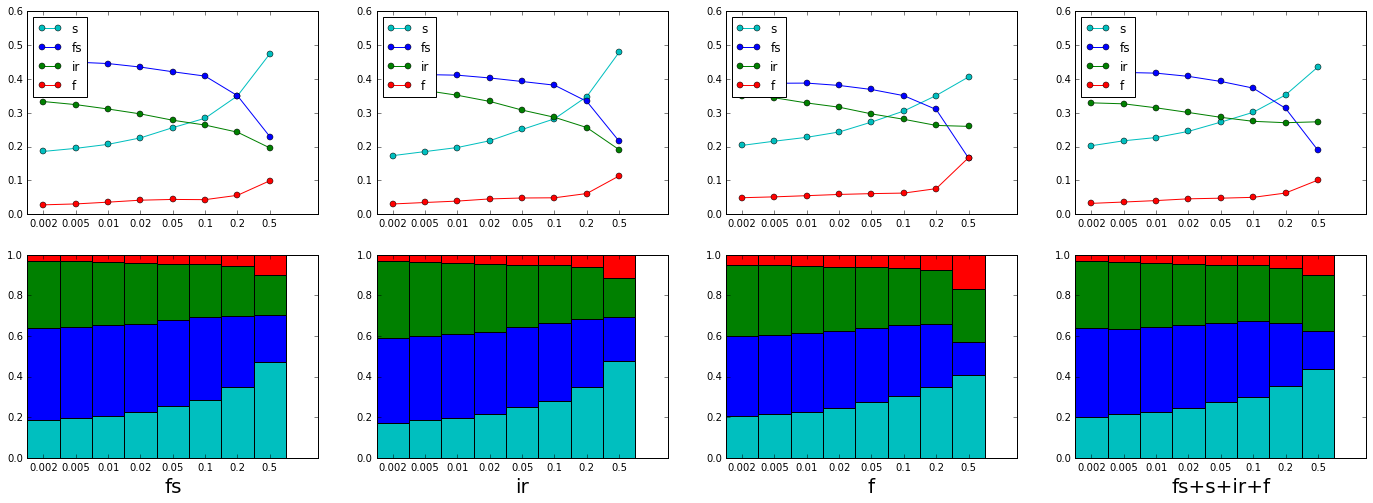

In [145]:
## edge proportion in the diffusion path
import json
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.ticker import NullFormatter
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import networkx as nx
datapath = "E:\\master\\myWork\\18familiarStrangers\\data\\"



## type portion in the spreading path between different dyad type (epidemic)
dataset = "fdu2013"
e0 = 2.000 #2.000 #1.585 #2.322  # 2.000
r0 = 0.106#0.106 #0.069507 #0.0119012  # 0.0834083
nodelist = json.load(open(datapath+"\\%s\\basic\\userlist_%s.json" % (dataset,dataset)))
timespans = {"fdu2013":{0.002:1008,0.005:1008,0.01:504,0.02:504,0.05:504,0.1:252,0.2:252,0.5:252,1.0:252},
            "fdu2014":{0.002:1008,0.005:1008,0.01:504,0.02:504,0.05:504,0.1:1008,0.2:1008,0.5:1008,1.0:1008},
            "fdu2009":{0.002:1008,0.005:1008,0.01:1008,0.02:1008,0.05:1008,0.1:1008,0.2:1008,0.5:1008,1.0:1008},
            "usc2006":{0.002:1008,0.005:1008,0.01:1008,0.02:1008,0.05:1008,0.1:1008,0.2:1008,0.5:1008,1.0:1008}}

processN = 3
count = 0
factors=1000
infectRates = [0.002,0.005,0.01,0.02,0.05,0.1,0.2,0.5];
plt.figure(figsize=(24,8))
typex = [["fs"],["ir"],["f"],["fs","s","ir","f"]] #"fs","ir","f",
typey = [["fs"],["ir"],["f"],["s"]]
for dyadT in typex:
    count += 1
    eachtype = {}
    for infectRate in infectRates:
        eachtype[infectRate] = {}
        for typei in typey:
            eachtype[infectRate]["+".join(typei)] = 0
        timespan = timespans[dataset][infectRate]
        Nnum = len(nodelist)/processN
        datafile = open(datapath+"%s\\spreadingResult\\SI\\proportion\\temporalNetwork_1hours_%s_%s_edgePortion.json" \
                    % (dataset,infectRate,timespan))
        portion = json.load(datafile)
        for typei in typey:
            for mmi in dyadT:
                for nni in typei:
                    eachtype[infectRate]["+".join(typei)] += portion[mmi][nni]/factors
                
        for ki in eachtype:
            total = float(sum(eachtype[ki].values()))
            for kki in eachtype[ki]:
                eachtype[ki][kki] /= float(total)
    
    width = 1
    offset = 11
    colors = ['c','b','g','r',]
    plt.subplot(2,4,count)
    c = 0
    for ti in (eachtype.values()[0]).keys():
        c += 1
        x = [eachtype[ki][ti] for ki in sorted(eachtype.keys())]
        ind = np.array(range(len(eachtype)))+ width/2.
        plt.plot(ind,x,'-o',color=colors[c-1],label=ti)
        plt.xticks(ind, sorted(eachtype.keys()))
        plt.xlim(0,9)
        plt.ylim(0,0.6)
        plt.legend(loc='upper left')
    
    plt.subplot(2,4,count+4)
    ind = np.array(range(len(eachtype)))
    x = [[0]+eachtype[ki].values() for ki in sorted(eachtype.keys())]
    x = np.array(zip(*x))
    for i in range(1,len(x)):
        bo = x[0]
        for j in range(1,i):
            bo = bo+x[j]
        plt.bar(ind, x[i], width, bottom = bo, label = (eachtype.values()[0]).keys()[i-1], color=colors[i-1])
        plt.xlabel("+".join(dyadT), fontsize=20)
        plt.xticks(np.array(ind) + width/2., sorted(eachtype.keys()))
        plt.xlim(0,9)
        plt.ylim(0,1)
#     plt.title('stacked bar')
#     plt.ylabel('portion')
#     plt.title('portion of different infectRate')
        
#     plt.xlabel("the proportion of different interaction types in the diffusion path")
#     plt.legend()
plt.show()


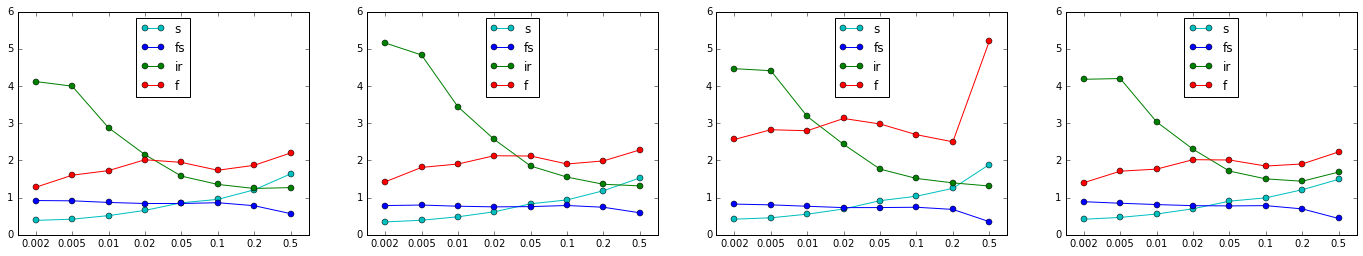

In [141]:
## edge proportion in the diffusion path --- normed
import json
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.ticker import NullFormatter
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import networkx as nx
datapath = "E:\\master\\myWork\\18familiarStrangers\\data\\"

dataset = "fdu2014"
e0 = 2.000 #2.000 #1.585 #2.322  # 2.000
r0 = 0.0834083#0.106 #0.069507 #0.0119012  # 0.0834083
nodelist = json.load(open(datapath+"\\%s\\basic\\userlist_%s.json" % (dataset,dataset)))
timespans = {"fdu2013":{0.002:1008,0.005:1008,0.01:504,0.02:504,0.05:504,0.1:252,0.2:252,0.5:252,1.0:252},
            "fdu2014":{0.002:1008,0.005:1008,0.01:504,0.02:504,0.05:504,0.1:1008,0.2:1008,0.5:1008,1.0:1008},
            "fdu2009":{0.002:1008,0.005:1008,0.01:1008,0.02:1008,0.05:1008,0.1:1008,0.2:1008,0.5:1008,1.0:1008},
            "usc2006":{0.002:1008,0.005:1008,0.01:1008,0.02:1008,0.05:1008,0.1:1008,0.2:1008,0.5:1008,1.0:1008}}

processN = 1
count = 0
factors=1
plt.figure(figsize=(24,4))
typex = [["fs"],["ir"],["f"],["s","fs","ir","f"]] #"fs","ir","f",
typey = [["fs"],["ir"],["f"],["s"]]
infectRates = [0.002,0.005,0.01,0.02,0.05,0.1,0.2,0.5]
for dyadT in typex:
    count += 1
    eachtype = {}
    for infectRate in infectRates:
        eachtype[infectRate] = {}
        for typei in typey:
            eachtype[infectRate]["+".join(typei)] = 0
        timespan = timespans[dataset][infectRate]
        Nnum = len(nodelist)/processN
        datafile = open(datapath+"%s\\spreadingResult\\SI\\proportion\\temporalNetwork_1hours_%s_%s_edgePortion.json" \
                    % (dataset,infectRate,timespan))
        portion = json.load(datafile)
        for typei in typey:
            for mmi in dyadT:
                for nni in typei:
                    eachtype[infectRate]["+".join(typei)] += portion[mmi][nni]/factors
                
        for ki in eachtype:
            total = float(sum(eachtype[ki].values()))
            for kki in eachtype[ki]:
                eachtype[ki][kki] /= float(total)
    
    width = 1
    offset = 11
    colors = ['c','b','g','r',]
    plt.subplot(1,4,count)
    c = 0
    p = 0.95
    edgeNum = json.load(open(datapath+"%s\\spreadingResult\\SI\\scale\\%s_edgeNum.json"%(dataset,p)))
    for ti in (eachtype.values()[0]).keys():
        c += 1
        x = [eachtype[ki][ti]/(edgeNum[str(ki)][ti]/float(sum(edgeNum[str(ki)].values()))) for ki in sorted(eachtype.keys())]
        ind = np.array(range(len(eachtype)))+ width/2.
        plt.plot(ind,x,'-o',color=colors[c-1],label=ti)
        plt.xticks(ind, sorted(eachtype.keys()))
        plt.xlim(0,8)
        plt.ylim(0,6)
        plt.legend(loc='upper center')
plt.show()

# output
p = 0.95
edgeNum = json.load(open(datapath+"%s\\spreadingResult\\SI\\scale\\%s_edgeNum.json"%(dataset,p)))
edgeImportance = {}
for infectRate in infectRates:
    edgeImportance[infectRate] = {}
for infectRate in infectRates:
    for ti in eachtype[infectRate]:
        x = eachtype[infectRate][ti]/(edgeNum[str(infectRate)][ti]/float(sum(edgeNum[str(infectRate)].values())))
        edgeImportance[infectRate][ti] = x
tofile = json.dumps(edgeImportance)
fw = open(datapath+"%s\\edgeImportance\\%.3f_%.3f.json"%(dataset,e0,r0),'w')
fw.write(tofile)
fw.close()






0.002
0.005
0.01
0.02
0.05
0.1
0.2
0.5


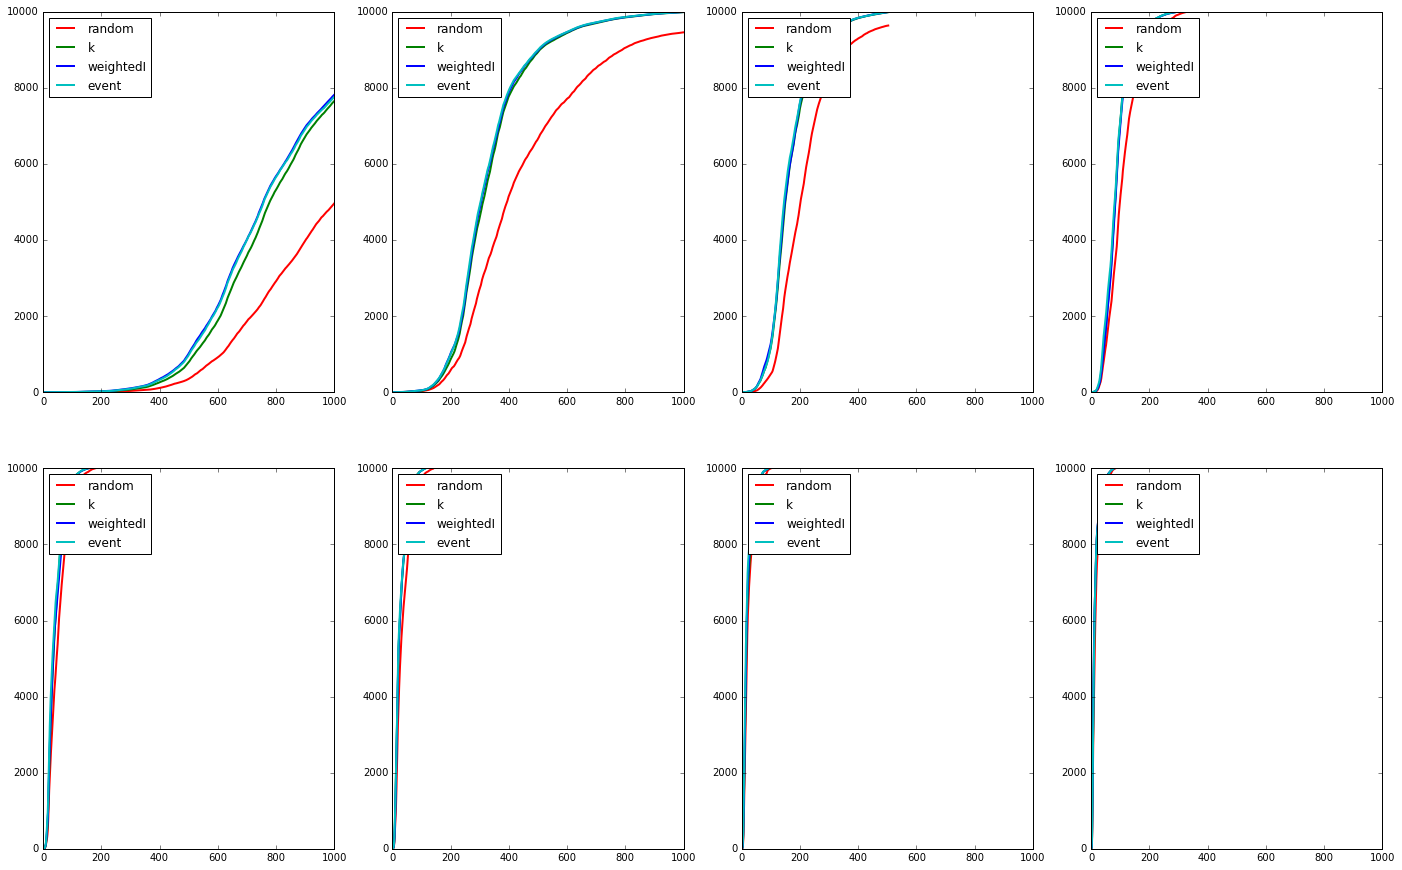

In [3]:
# spreading scale for different set of source node(averaged)
#initial
import random
dataset = "fdu2013"
e0 = 2.000 #2.000 #1.585 #2.322  # 2.000
r0 = 0.106 #0.106 #0.069507 #0.0119012  # 0.0834083
rate = 100 #%10
infectRates = [0.002,0.005,0.01,0.02,0.05,0.1,0.2,0.5]
node_Importance = json.load(open(datapath+"%s\\nodeImportance\\%.3f_%.3f.json"%(dataset,e0,r0)))
edge_Importance = json.load(open(datapath+"%s\\edgeImportance\\%.3f_%.3f.json"%(dataset,e0,r0)))
node_degree = {}
node_event = {}
node_random = {}
node_weightedI = {}
for infectRate in infectRates:
    node_weightedI[infectRate] = {}
# for ki,vi in node_Importance.items():
#     node_degree[ki] = vi["k"]
#     node_event[ki] = vi["event"]
#     for infectRate in infectRates:
#         node_weightedI[infectRate][ki] = vi["neighbor"]["fs"]*edge_Importance[str(infectRate)]["fs"]\
#                                         + vi["neighbor"]["ir"]*edge_Importance[str(infectRate)]["ir"]\
#                                         + vi["neighbor"]["f"]*edge_Importance[str(infectRate)]["f"]\
#                                         + vi["neighbor"]["s"]*edge_Importance[str(infectRate)]["s"]
for ki,vi in node_Importance.items():
    node_degree[ki] = vi["k"]
    node_event[ki] = vi["event"]
    for infectRate in infectRates:
        node_weightedI[infectRate][ki] = vi["neighbor"]["ir"]*5+vi["neighbor"]["f"]*1+vi["neighbor"]["fs"]*4+vi["neighbor"]["s"]*0
        
nodeset = {"k":[],"event":[],"weightedI":{},"random":[]}
nodeset["k"] = [x[0] for x in sorted(node_degree.iteritems(),key=lambda d:int(d[1]))][-rate:]
nodeset["event"] = [x[0] for x in sorted(node_event.iteritems(),key=lambda d:int(d[1]))][-rate:]
nodeset["random"] = random.sample(node_Importance.keys(),rate)
for infectRate in infectRates:
    nodeset["weightedI"][infectRate] = [x[0] for x in sorted(node_weightedI[infectRate].iteritems(),key=lambda d:int(d[1]))][-rate:]            
                    
timespans = {"fdu2013":{0.002:1008,0.005:1008,0.01:504,0.02:504,0.05:504,0.1:252,0.2:252,0.5:252,1.0:252},
            "fdu2014":{0.002:1008,0.005:1008,0.01:504,0.02:504,0.05:504,0.1:1008,0.2:1008,0.5:1008,1.0:1008},
            "fdu2009":{0.002:1008,0.005:1008,0.01:1008,0.02:1008,0.05:1008,0.1:1008,0.2:1008,0.5:1008,1.0:1008},
            "usc2006":{0.002:1008,0.005:1008,0.01:1008,0.02:1008,0.05:1008,0.1:1008,0.2:1008,0.5:1008,1.0:1008}}
plt.figure(figsize = (24,15))
strategys = ['random',"k","weightedI","event"]
colors={"random":'r',"k":"g","weightedI":"b","event":'c'}
fi = 0
for infectRate in infectRates:
    print infectRate
    fi+=1
    subplot(2,4,fi);
    timespan = timespans[dataset][infectRate]
    for strategy in strategys:
#         print strategy
        nodeseti =[]
        if strategy == "weightedI":
            nodeseti = nodeset[strategy][infectRate]
        else:
            nodeseti = nodeset[strategy]
        scale = json.load(open(datapath + "%s\\spreadingResult\\SI\\scale\\temporalNetwork_1hours_%s_%s_scale.json"\
                    % (dataset,infectRate, timespan)))
        select_scale = {}
        for ti in range(0,timespan):
            select_scale[ti] = []
        for si in range(len(scale["source"])):
#             print si
            if str(scale["source"][si]) in set(nodeseti):
                for ti in range(0,timespan):
                    select_scale[ti].append(scale[str(ti)][si])
        ind = range(0,timespan)
        scaley = [np.array(x[1]).mean() for x in sorted(select_scale.iteritems(),key=lambda d:int(d[0]))]
        plt.plot(ind,scaley,label=strategy, linewidth=2, color=colors[strategy])
        plt.ylim(0,10000)
        plt.xlim(0,1000)
#         if fi<3:
#             plt.xlim(0,1000)
#         if fi==3:
#             plt.xlim(0,500)
#         if fi==4:
#             plt.xlim(0,200)
#         if fi==5:
#             plt.xlim(0,100)
#         if fi==6:
#             plt.xlim(0,80)
#         if fi>6:
#             plt.xlim(0,50)
        plt.legend(loc="upper left")
plt.show()
        

0.005
random
k
weightedI
0.01
random
k
weightedI
0.02
random
k
weightedI
0.05
random
k
weightedI
0.1
random
k
weightedI
0.2
random
k
weightedI
0.5
random
k
weightedI
1.0
random
k
weightedI


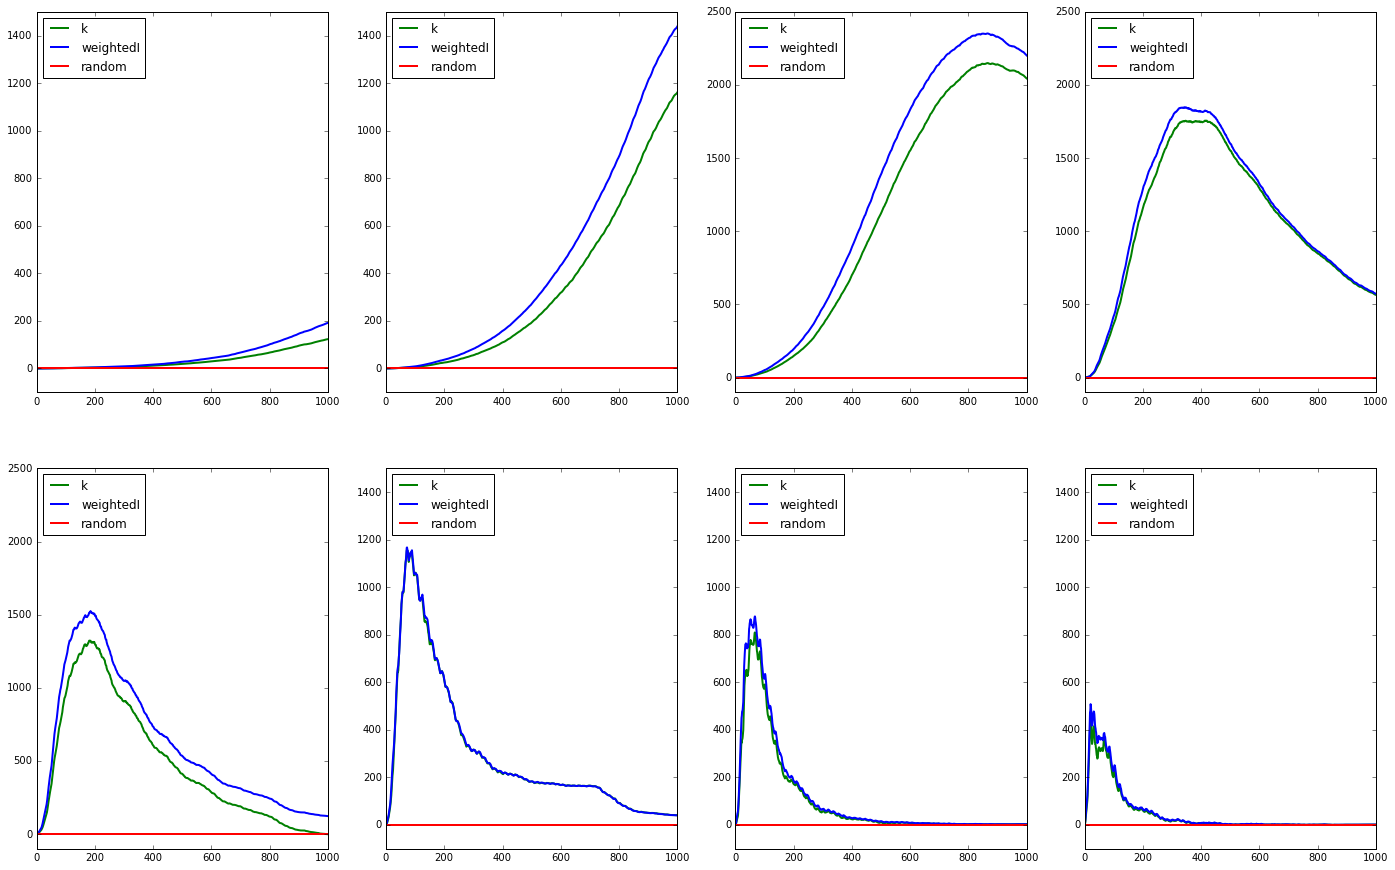

In [137]:
# spreading scale for different set of source node(averaged)
#initial
import random
dataset = "fdu2009"
e0 = 1.585 #2.000 #1.585 #2.322  # 2.000
r0 = 0.069507#0.106 #0.069507 #0.0119012  # 0.0834083
rate = 50 #%10
infectRates = [0.005,0.01,0.02,0.05,0.1,0.2,0.5,1.0]
node_Importance = json.load(open(datapath+"%s\\nodeImportance\\%.3f_%.3f.json"%(dataset,e0,r0)))
edge_Importance = json.load(open(datapath+"%s\\edgeImportance\\%.3f_%.3f.json"%(dataset,e0,r0)))
node_degree = {}
node_event = {}
node_random = {}
node_weightedI = {}
for infectRate in infectRates:
    node_weightedI[infectRate] = {}
for ki,vi in node_Importance.items():
    node_degree[ki] = vi["k"]
    node_event[ki] = vi["event"]
    for infectRate in infectRates:
        node_weightedI[infectRate][ki] = vi["neighbor"]["fs"]*edge_Importance[str(infectRate)]["fs"]\
                                        + vi["neighbor"]["ir"]*edge_Importance[str(infectRate)]["ir"]\
                                        + vi["neighbor"]["f"]*edge_Importance[str(infectRate)]["f"]\
                                        + vi["neighbor"]["s"]*edge_Importance[str(infectRate)]["s"]
nodeset = {"k":[],"event":[],"weightedI":{},"random":[]}
nodeset["k"] = [x[0] for x in sorted(node_degree.iteritems(),key=lambda d:int(d[1]))][-rate:]
nodeset["event"] = [x[0] for x in sorted(node_event.iteritems(),key=lambda d:int(d[1]))][-rate:]
nodeset["random"] = random.sample(node_Importance.keys(),rate)
for infectRate in infectRates:
    nodeset["weightedI"][infectRate] = [x[0] for x in sorted(node_weightedI[infectRate].iteritems(),key=lambda d:int(d[1]))][-rate:]            

timespans = {"fdu2013":{0.002:1008,0.005:1008,0.01:504,0.02:504,0.05:504,0.1:252,0.2:252,0.5:252,1.0:252},
            "fdu2014":{0.002:1008,0.005:1008,0.01:504,0.02:504,0.05:504,0.1:1008,0.2:1008,0.5:1008,1.0:1008},
            "fdu2009":{0.002:1008,0.005:1008,0.01:1008,0.02:1008,0.05:1008,0.1:1008,0.2:1008,0.5:1008,1.0:1008},
            "usc2006":{0.002:1008,0.005:1008,0.01:1008,0.02:1008,0.05:1008,0.1:1008,0.2:1008,0.5:1008,1.0:1008}}

# figure
plt.figure(figsize = (24,15))
strategys = ['random',"k","weightedI"]
fi = 0

for infectRate in infectRates:
    print infectRate
    scaley = []
    fi+=1
    subplot(2,4,fi);
    timespan = timespans[dataset][infectRate]
    for strategy in strategys:
#         print strategy
        nodeseti =[]
        if strategy == "weightedI":
            nodeseti = nodeset[strategy][infectRate]
        else:
            nodeseti = nodeset[strategy]
        scale = json.load(open(datapath + "%s\\spreadingResult\\SI\\scale\\temporalNetwork_1hours_%s_%s_scale.json"\
                    % (dataset,infectRate, timespan)))
        select_scale = {}
        for ti in range(0,timespan):
            select_scale[ti] = []
        for si in range(len(scale["source"])):
#             print si
            if str(scale["source"][si]) in set(nodeseti):
                for ti in range(0,timespan):
                    select_scale[ti].append(scale[str(ti)][si])
        
        scaley.append([np.array(x[1]).mean() for x in sorted(select_scale.iteritems(),key=lambda d:int(d[0]))])
    ind = range(0,timespan)
    plt.plot(ind,np.array(scaley[1])-np.array(scaley[0]),'g',label=strategys[1], linewidth=2)
    plt.plot(ind,np.array(scaley[2])-np.array(scaley[0]),'b',label=strategys[2],linewidth=2)
    plt.plot(ind,[0]*len(ind),'r',label=strategys[0],linewidth=2)
    plt.ylim(-100,1500)
    plt.xlim(0,1000)
#     if fi<3:
#         plt.xlim(0,1000)
    if fi==3:
        plt.ylim(-100,2500)
    if fi==4:
        plt.ylim(-100,2500)
    if fi==5:
        plt.ylim(-100,2500)
#     if fi==6:
#         plt.xlim(0,80)
#     if fi>6:
#         plt.xlim(0,50)
    plt.legend(loc='upper left')
plt.show()
        

0.005
random :  0.00641526155692
WTI :  0.681032902396
k :  0.552755101085
strong tie :  0.68600200587
event :  0.646651644665
k_shell :  0.447988745543
close_c :  -0.00293976684667
bet_c :  0.00641526155692
0.02
random :  0.00444523974468
WTI :  0.634348140017
k :  0.547671584674
strong tie :  0.631240551847
event :  0.606998367307
k_shell :  0.431715245058
close_c :  -0.00236794130971
bet_c :  0.00444523974468


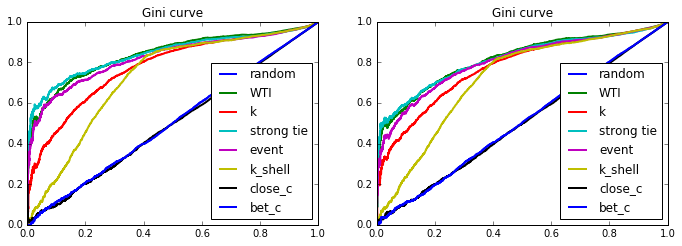

In [158]:
## average infect time rank （old）
import random
import operator
def Gini(real, pred, si, infectr):
    n_sample = len(real)
    gini = []
    set_real = set()
    set_remained_pred = set()
    in_set_count = 0
    for i in range(n_sample):
        set_real.add(real[i])
        set_remained_pred.add(pred[i])
        tmp = set_real & set_remained_pred
        in_set_count += len(tmp)
        set_remained_pred -= tmp
        gini.append(in_set_count/float(i+1))
    ind = np.linspace(1.0/n_sample, 1, n_sample)
    plt.plot(ind,  gini, label = si, linewidth=2);
    normedGini = ((sum(np.array(gini)*(1.0/n_sample))-1.0/(2*n_sample))-0.5)/0.5
#     plt.title("infectRate= %f"% infectr)
    plt.title("Gini curve")
    print si, ": ", normedGini



dataset = "fdu2013"
er = {"fdu2013":{"e0":2.000,"r0":0.106},
      "fdu2014":{"e0":2.000,"r0":0.0834083},
      "fdu2009":{"e0":1.585,"r0":0.069507},
      "usc2006":{"e0":2.322,"r0":0.0119012}}
e0 = er[dataset]["e0"]
r0 = er[dataset]["r0"]
infectRates = [0.005, 0.02]
node_Importance = json.load(open(datapath+"%s\\nodeImportance\\%.3f_%.3f.json"%(dataset,e0,r0)))
edge_Importance = json.load(open(datapath+"%s\\edgeImportance\\%.3f_%.3f.json"%(dataset,e0,r0)))

node_rank = {}
node_weightedI = {}
node_degree = {}
node_strongtie = {}
for ki,vi in node_Importance.items(): #2014:2,5,3,0 fdu2013:1,8,2,0, 2009
    node_degree[ki] = vi["neighbor"]["fs"]*1  \
                    + vi["neighbor"]["ir"]*1  \
                    + vi["neighbor"]["f"]*1\
                    + vi["neighbor"]["s"]*1
    node_weightedI[ki] = vi["neighbor"]["fs"]*1 \
                       + vi["neighbor"]["ir"]*3.5 \
                       + vi["neighbor"]["f"]* 2\
                       + vi["neighbor"]["s"]*0
    node_strongtie[ki] = vi["neighbor"]["fs"]*1 \
                       + vi["neighbor"]["ir"]*8 \
                       + vi["neighbor"]["f"]*2 \
                       + vi["neighbor"]["s"]*0
node_rank = {"k":[],"event":[],"WTI":{},"random":[], "strongtie":[], "close_c":[],"ks":[],"bet_c":[]}
node_rank["k"] = [x[0] for x in sorted(node_degree.iteritems(),key=lambda d:int(d[1]))]
node_rank["WTI"] = [x[0] for x in sorted(node_weightedI.iteritems(),key=lambda d:int(d[1]))]
node_rank["strong tie"] = [x[0] for x in sorted(node_strongtie.iteritems(),key=lambda d:int(d[1]))]
node_rank["event"] = [x[0] for x in sorted(node_Importance.iteritems(),key=lambda d:int(d[1]["event"]))]
node_rank["bet_c"] = [x[0] for x in sorted(node_Importance.iteritems(),key=lambda d:int(d[1]["bet_c"]))]
node_rank["close_c"] = [x[0] for x in sorted(node_Importance.iteritems(),key=lambda d:int(d[1]["close_c"]))]
node_rank["close_c"].reverse()
node_rank["k_shell"] = [x[0] for x in sorted(node_Importance.iteritems(),key=lambda d:int(d[1]["ks"]))]
node_rank["random"] = node_Importance.keys()       
timespans = {"fdu2013":{0.002:1008,0.005:1008,0.01:504,0.02:504,0.05:504,0.1:252,0.2:252,0.5:252,1.0:252},
            "fdu2014":{0.002:1008,0.005:1008,0.01:504,0.02:504,0.05:504,0.1:1008,0.2:1008,0.5:1008,1.0:1008},
            "fdu2009":{0.002:1008,0.005:1008,0.01:1008,0.02:1008,0.05:1008,0.1:1008,0.2:1008,0.5:1008,1.0:1008},
            "usc2006":{0.002:1008,0.005:1008,0.01:1008,0.02:1008,0.05:1008,0.1:1008,0.2:1008,0.5:1008,1.0:1008}}

plt.figure(figsize=(24,8))
fi = 0
for infectRate in infectRates:
    print infectRate
    fi += 1
    plt.subplot(2,4,fi)
    timespan = timespans[dataset][infectRate]
    Itime = json.load(open(datapath+"%s\\spreadingResult\\SI\\nodeInfectTime\\temporalNetwork_1hours_%s_%s_time.json"%(dataset,infectRate,timespan)))
    strategys = ["random", "WTI", "k", "strong tie", "event", "k_shell", "close_c","bet_c"]
    for strategy in strategys:
        predRank = [int(x) for x in node_rank[strategy]]
        predRank.reverse()
        realdata = [(x,Itime[x][0]) for x in node_rank[strategy]]
        realdata.sort(key=operator.itemgetter(1))
        realRank = [int(x[0]) for x in realdata]
        Gini(realRank,predRank,strategy,infectRate)
    plt.legend(loc='lower right')
#     for strategy in strategys:
#         groupn = 500
#         grouplen = len(node_Importance)/groupn
#         groupind = np.array(range(groupn))*grouplen
#         grouptime = []
#         for gi in range(groupn):
#             nodes = node_rank[strategy][gi*grouplen:min((gi+1)*grouplen, len(node_Importance))]
#             averageTime = 0
#             for nodei in nodes:
#                 averageTime += Itime[nodei][0]
#             averageTime = averageTime/float(len(nodes))
#             grouptime.append(averageTime)
#         groupind = list(groupind)
#         groupind.reverse()    
#         plt.plot(groupind,grouptime,label=strategy)
#     plt.legend(loc='upper left')
#     plt.xlim(0,9000)
#     plt.ylim(300,900)
#     plt.xlabel("pred_rank", fontsize=16)
#     plt.ylabel("infect time",fontsize=16)
plt.show()

k :  0.533152848418
ad :  0.397115543961
cn :  0.107217549585
wit :  0.644137775362
wci1 :  0.573612744716
ae :  0.642730437749
r :  0.0655380960997


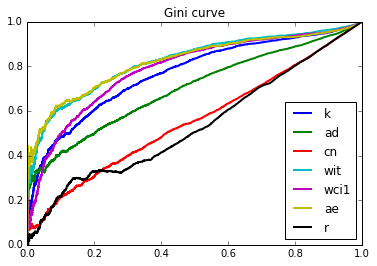

In [43]:
## average infect time rank （new）
import random
import operator
def Gini(real, pred, si, infectr):
    n_sample = len(real)
    gini = []
    set_real = set()
    set_remained_pred = set()
    in_set_count = 0
    for i in range(n_sample):
        set_real.add(real[i])
        set_remained_pred.add(pred[i])
        tmp = set_real & set_remained_pred
        in_set_count += len(tmp)
        set_remained_pred -= tmp
        gini.append(in_set_count/float(i+1))
    ind = np.linspace(1.0/n_sample, 1, n_sample)
    plt.plot(ind,  gini, label = si, linewidth=2);
    normedGini = ((sum(np.array(gini)*(1.0/n_sample))-1.0/(2*n_sample))-0.5)/0.5
#     plt.title("infectRate= %f"% infectr)
    plt.title("Gini curve")
    print si, ": ", normedGini

dataset = "fdu2014"
er = {"fdu2013":{"e0":2.000,"r0":0.106},
      "fdu2014":{"e0":2.000,"r0":0.0834083},
      "fdu2009":{"e0":1.585,"r0":0.069507},
      "usc2006":{"e0":2.322,"r0":0.0119012}}
timespans = {"fdu2013":{0.002:1008,0.005:1008,0.01:504,0.02:504,0.05:504,0.1:252,0.2:252,0.5:252,1.0:252},
            "fdu2014":{0.002:1008,0.005:1008,0.01:504,0.02:504,0.05:504,0.1:1008,0.2:1008,0.5:1008,1.0:1008},
            "fdu2009":{0.002:1008,0.005:1008,0.01:1008,0.02:1008,0.05:1008,0.1:1008,0.2:1008,0.5:1008,1.0:1008},
            "usc2006":{0.002:1008,0.005:1008,0.01:1008,0.02:1008,0.05:1008,0.1:1008,0.2:1008,0.5:1008,1.0:1008}}
e0 = er[dataset]["e0"]
r0 = er[dataset]["r0"]
beta = 0.005
node_Importance = json.load(open(datapath+"%s\\nodeImportance\\nodeImportance_%s.json"%(dataset,dataset)))
nodelist = [str(int(x)) for x in json.load(open(datapath+"%s\\basic\\userlist_%s.json" % (dataset,dataset)))]
node_rank = {}
node_k = {} # total degree
node_ad = {} # acquaintance degree
node_cn = {} # in degree of closest neighbors
node_wit = {} # weighted interaction tie degree
node_wci1 = {} # weighted fs + weighted cn_1
node_wci2 = {} # weighted fs + weighted cn_2
node_wci3 = {}# weighted fs + weighted cn_3
node_ae = {} # weighted fs + acquaintance events

node_strongtie = {}
for ni in nodelist: #2014:2,5,3,0 fdu2013:1,8,2,0, 2009
    node_k[ni] = node_Importance["k"].get(ni,0)
    node_ad[ni] = node_Importance["acquaintance_degree"].get(ni,0)
    node_cn[ni] = node_Importance["closest_neighbor_1"].get(ni,0)
    node_wit[ni] = node_Importance["neighbor"].get(ni,{}).get("fs",0)*1\
                       + node_Importance["neighbor"].get(ni,{}).get("ir",0)*2 \
                       + node_Importance["neighbor"].get(ni,{}).get("f",0)*2
    node_wci1[ni] = node_Importance["neighbor"].get(ni,{}).get("fs",0)*1 \
                    + node_Importance["closest_neighbor_1"].get(ni,0)*10
    node_wci2[ni] = node_Importance["neighbor"].get(ni,{}).get("fs",0)*1 \
                    + node_Importance["closest_neighbor_2"].get(ni,0)*1
    node_wci3[ni] = node_Importance["neighbor"].get(ni,{}).get("fs",0)*1 \
                    + node_Importance["closest_neighbor_3"].get(ni,0)*10
    node_ae[ni] = node_Importance["neighbor"].get(ni,{}).get("fs",0)*1 \
                    + node_Importance["acquaintance_event"].get(ni,0)*0.25
    
node_rank = {"k":[],"ad":[],"cn":{},"wit":[], "wci1":[], "wci2":[],"wci3":[], "ae":[], "r":[]}
node_rank["k"] = [x[0] for x in sorted(node_k.iteritems(),key=lambda d:int(d[1]), reverse = True)]
node_rank["ad"] = [x[0] for x in sorted(node_ad.iteritems(),key=lambda d:int(d[1]), reverse = True)]
node_rank["cn"] = [x[0] for x in sorted(node_cn.iteritems(),key=lambda d:int(d[1]), reverse = True)]
node_rank["wit"] = [x[0] for x in sorted(node_wit.iteritems(),key=lambda d:int(d[1]), reverse = True)]
node_rank["wci1"] = [x[0] for x in sorted(node_wci1.iteritems(),key=lambda d:int(d[1]), reverse = True)]
node_rank["wci2"] = [x[0] for x in sorted(node_wci2.iteritems(),key=lambda d:int(d[1]), reverse = True)]
node_rank["wci3"] = [x[0] for x in sorted(node_wci3.iteritems(),key=lambda d:int(d[1]), reverse = True)]
node_rank["ae"] = [x[0] for x in sorted(node_ae.iteritems(),key=lambda d:int(d[1]), reverse = True)]
node_rank["r"] = nodelist
plt.figure()
timespan = timespans[dataset][beta]
Itime = json.load(open(datapath+"%s\\spreadingResult\\SI\\nodeInfectTime\\temporalNetwork_1hours_%s_%s_time.json"%(dataset,beta,timespan)))
strategys = ["k", "ad", "cn", "wit", "wci1","ae", "r"]
for strategy in strategys:
    predRank = [int(x) for x in node_rank[strategy]]
    realdata = [(x,Itime[x][0]) for x in node_rank[strategy]]
    realdata.sort(key=operator.itemgetter(1))
    realRank = [int(x[0]) for x in realdata]
    Gini(realRank,predRank,strategy,beta)
plt.legend(loc='lower right')
plt.show()

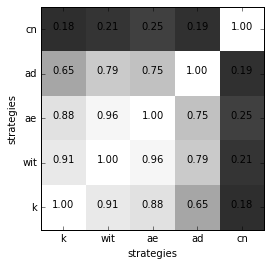

In [123]:
## node importance rank similarity of different strategies
from scipy import stats
dataset = "fdu2014"
er = {"fdu2013":{"e0":2.000,"r0":0.106},
      "fdu2014":{"e0":2.000,"r0":0.0834083},
      "fdu2009":{"e0":1.585,"r0":0.069507},
      "usc2006":{"e0":2.322,"r0":0.0119012}}
timespans = {"fdu2013":{0.002:1008,0.005:1008,0.01:504,0.02:504,0.05:504,0.1:252,0.2:252,0.5:252,1.0:252},
            "fdu2014":{0.002:1008,0.005:1008,0.01:504,0.02:504,0.05:504,0.1:1008,0.2:1008,0.5:1008,1.0:1008},
            "fdu2009":{0.002:1008,0.005:1008,0.01:1008,0.02:1008,0.05:1008,0.1:1008,0.2:1008,0.5:1008,1.0:1008},
            "usc2006":{0.002:1008,0.005:1008,0.01:1008,0.02:1008,0.05:1008,0.1:1008,0.2:1008,0.5:1008,1.0:1008}}
e0 = er[dataset]["e0"]
r0 = er[dataset]["r0"]
beta = 0.005
node_Importance = json.load(open(datapath+"%s\\nodeImportance\\nodeImportance_%s.json"%(dataset,dataset)))
nodelist = [str(int(x)) for x in json.load(open(datapath+"%s\\basic\\userlist_%s.json" % (dataset,dataset)))]
node_rank = {}
node_k = {} # total degree
node_ad = {} # acquaintance degree
node_cn = {} # in degree of closest neighbors
node_wit = {} # weighted interaction tie degree
node_wci1 = {} # weighted fs + weighted cn_1
node_wci2 = {} # weighted fs + weighted cn_2
node_wci3 = {}# weighted fs + weighted cn_3
node_ae = {} # weighted fs + acquaintance events

node_strongtie = {}
for ni in nodelist: #2014:2,5,3,0 fdu2013:1,8,2,0, 2009
    node_k[ni] = node_Importance["k"].get(ni,0)
    node_ad[ni] = node_Importance["acquaintance_degree"].get(ni,0)
    node_cn[ni] = node_Importance["closest_neighbor_1"].get(ni,0)
    node_wit[ni] = node_Importance["neighbor"].get(ni,{}).get("fs",0)*1 \
                       + node_Importance["neighbor"].get(ni,{}).get("ir",0)*2 \
                       + node_Importance["neighbor"].get(ni,{}).get("f",0)* 2
    node_wci1[ni] = node_Importance["neighbor"].get(ni,{}).get("fs",0)*1 \
                    + node_Importance["closest_neighbor_1"].get(ni,0)*10
    node_wci2[ni] = node_Importance["neighbor"].get(ni,{}).get("fs",0)*1 \
                    + node_Importance["closest_neighbor_2"].get(ni,0)*1
    node_wci3[ni] = node_Importance["neighbor"].get(ni,{}).get("fs",0)*1 \
                    + node_Importance["closest_neighbor_3"].get(ni,0)*10
    node_ae[ni] = node_Importance["neighbor"].get(ni,{}).get("fs",0)*1 \
                    + node_Importance["acquaintance_event"].get(ni,0)*0.25
    
node_rank = {"k":[],"ad":[],"cn":{},"wit":[], "ae":[]}
node_rank["k"] = [node_k.get(x,0) for x in nodelist]
node_rank["ad"] = [node_ad.get(x,0) for x in nodelist]
node_rank["cn"] = [node_cn.get(x,0) for x in nodelist]
node_rank["wit"] = [node_wit.get(x,0) for x in nodelist]
node_rank["ae"] = [node_ae.get(x,0) for x in nodelist]
sim = np.zeros((len(node_rank), len(node_rank)))
for i in range(len(sim)):
    for j in range(len(sim)):
        sim[i][j] = (stats.spearmanr(node_rank[node_rank.keys()[i]], node_rank[node_rank.keys()[j]]))[0]
plt.imshow(sim, cmap=plt.cm.gray, interpolation='nearest',vmin=0, vmax=1,origin='lower')
for i in range(len(sim)):
    for j in range(len(sim)):
        plt.text(i,j,"%.2f"%sim[i][j],horizontalalignment='center')
plt.xlabel("strategies")
plt.ylabel("strategies")
labels = node_rank.keys()
plt.xticks(range(len(sim)), labels)
plt.yticks(range(len(sim)), labels)
plt.show()

0.002
Linear model: -0.129 * X0 + -0.296 * X1 + -0.184 * X2 + -0.004 * X3
[ 0.21024766  0.48267758  0.30032285  0.00675192]
0.005
Linear model: -0.194 * X0 + -0.218 * X1 + -0.563 * X2 + -0.036 * X3
0.01
Linear model: -0.098 * X0 + -0.11 * X1 + -0.305 * X2 + -0.026 * X3
0.05
Linear model: -0.03 * X0 + -0.034 * X1 + -0.118 * X2 + -0.017 * X3
0.1
Linear model: -0.018 * X0 + -0.026 * X1 + -0.081 * X2 + -0.012 * X3
0.5
Linear model: -0.008 * X0 + -0.02 * X1 + -0.052 * X2 + -0.007 * X3
[ 0.09177066  0.22470847  0.6019698   0.08155107]


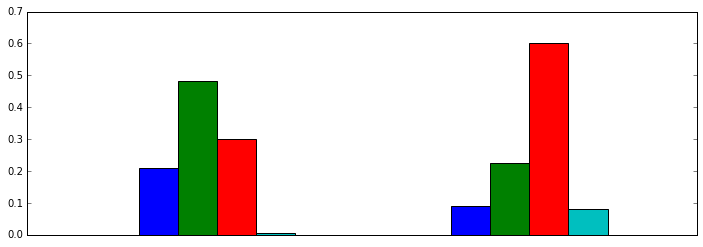

In [23]:
## optimize the edge type weight for different infectRate
from sklearn.linear_model import LinearRegression
def pretty_print_linear(coefs, names = None, sort = False):
    if names == None:
        names = ["X%s" % x for x in range(len(coefs))]
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst,  key = lambda x:-np.abs(x[0]))
    return " + ".join("%s * %s" % (round(coef, 3), name)
                       for coef, name in lst)

dataset = "fdu2013"
e0 =  2.000 #2.000 #1.585 #2.322  # 2.000
r0 = 0.106#0.106 #0.069507 #0.0119012  # 0.0834083
infectRates = [0.002,0.005, 0.01,0.05,0.1,0.5]
timespans = {"fdu2013":{0.002:1008,0.005:1008,0.01:504,0.02:504,0.05:504,0.1:252,0.2:252,0.5:252,1.0:252},
            "fdu2014":{0.002:1008,0.005:1008,0.01:504,0.02:504,0.05:504,0.1:1008,0.2:1008,0.5:1008,1.0:1008},
            "fdu2009":{0.002:1008,0.005:1008,0.01:1008,0.02:1008,0.05:1008,0.1:1008,0.2:1008,0.5:1008,1.0:1008},
            "usc2006":{0.002:1008,0.005:1008,0.01:1008,0.02:1008,0.05:1008,0.1:1008,0.2:1008,0.5:1008,1.0:1008}}
node_Importance = json.load(open(datapath+"%s\\nodeImportance\\%.3f_%.3f.json"%(dataset,e0,r0)))
fi = 0
groupwidth = 3
barwidth = 0.35
plt.figure(figsize=(12,4))
for infectRate in infectRates:
    print infectRate
    timespan = timespans[dataset][infectRate]
    Itime = json.load(open(datapath+"%s\\spreadingResult\\SI\\nodeInfectTime\\temporalNetwork_1hours_%s_%s_time.json"%(dataset,infectRate,timespan)))
    X = []
    Y = []
    for ni, vi in node_Importance.items():
        X.append([vi["neighbor"]["fs"], vi["neighbor"]["ir"],vi["neighbor"]["f"],vi["neighbor"]["s"]])
        Y.append(Itime[ni][0])
    X = np.array(X)
    Y = np.array(Y)
    lr = LinearRegression(normalize=True)
    lr.fit(X, Y)
    #A helper method for pretty-printing linear models
    print "Linear model:", pretty_print_linear(lr.coef_)
    if (infectRate==infectRates[0]) | (infectRate==infectRates[-1]):
        index = np.array(range(len(lr.coef_))) * barwidth +1+ barwidth*(4+len(lr.coef_))*fi
        a = plt.bar(index,abs(lr.coef_)/(sum(abs(lr.coef_))),barwidth)
        colors = ["b","g","r","c"]
        print abs(lr.coef_)/(sum(abs(lr.coef_)))
        for i in range(len(a)):
            a[i].set_facecolor(colors[i])
        fi +=1 
        plt.xticks([])
        plt.xlim(0,6)
plt.show()
    

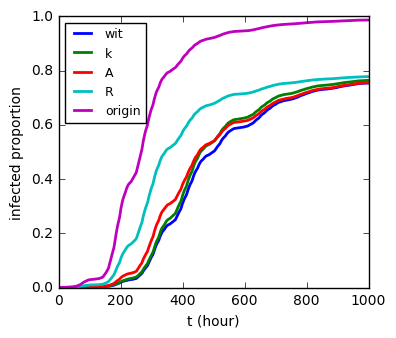

In [24]:
## spreding scale
dataset = "fdu2014"
nodeN = {"fdu2013":10146, "fdu2014":9028, "fdu2009":6003, "usc2006":5185}
betas = [0.01]
f = 0.2
start = 504
stop = 1512
strategies = ["wit","k","acquaintance_degree","R","SI"]
Smarker = {}
Slabel = {"k":"k","R":"R","acquaintance_degree":"A","wit":"wit","SI":"origin"}
#strategies = ["n_k","n_a","n_w","n_wit"]

fig = plt.figure(figsize = (4,3.5))
ax = plt.subplot(111)
for beta in betas:
    for si in strategies:
        if si == "SI":
            ff = 0.0
        else:
            ff = f
        infectScale = json.load(open(datapath+"%s\\spreadingResult\\targetImmune\\scale\\%s_%s_%s.json"%(dataset,beta,ff,si)))
        ss = np.zeros(stop-start)
        for ni in infectScale:
            ss += np.array(infectScale[ni])
        ss = ss/float(len(infectScale))
        x = range(0,stop-start)
        y = [xi/float(nodeN[dataset]) for xi in ss]
        ax.plot(x,y,'-', label=Slabel[si], linewidth = 2)
ax.legend(loc="upper left", fontsize=9)
ax.set_xlabel("t (hour)")
ax.set_ylabel("infected proportion")
ax.set_xlim(0,1000)
plt.show()


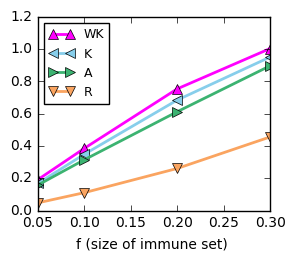

In [25]:
## harf spreading time vs f
dataset = "fdu2014"
halfT = json.load(open(datapath+"%s\\spreadingResult\\targetImmune\\scale\\halfSpreadingTime.json"%dataset))
beta = 0.005
fs = [0.05,0.1,0.2,0.3]
strategies = ["wit","k","acquaintance_degree","R"]
strategiename = {"wit":"WK","k":"K","acquaintance_degree":"A","R":"R"}
markers = ["-^","-<","->","-v"]
colors = ["fuchsia","skyblue","mediumseagreen","sandybrown"]
# strategies = ["n_k","n_a","n_wit"]
fig = plt.figure(figsize=(3,2.5))
ax = plt.subplot(111)
ci = 0
for si in strategies:
    x = fs
    y = [halfT[str(beta)][str(xi)][str(si)][0] for xi in x]
    ax.plot(x,y,markers[ci],label=strategiename[si], linewidth=2,color = colors[ci], markersize = 7)
    ci += 1
ax.legend(loc="upper left", fontsize=9)
ax.set_xlabel("f (size of immune set) ")
plt.show()

[0.13066977509249147, 0.2586436109769338, 0.5619203019874416, 0.8362665555879288]
[0.11168057272926149, 0.22204942121132956, 0.49649405238118555, 0.7668464180527567]
[0.13136630356625723, 0.24468672308817635, 0.493064574243211, 0.7320220764942033]
[0.08014543133790358, 0.15011736763637024, 0.2935408440580439, 0.4503932588903822]


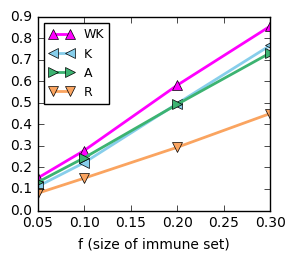

In [3]:
## final infect scale vs f
dataset = "fdu2014"
finalScale = json.load(open(datapath+"%s\\spreadingResult\\targetImmune\\scale\\finalScale_target.json"%dataset))
beta = 0.005
fs = [0.05,0.1,0.2,0.3]
strategies = ["wit","k","acquaintance_degree","R"]
strategiename = {"wit":"WK","k":"K","acquaintance_degree":"A","R":"R"}
markers = ["-^","-<","->","-v"]
colors = ["fuchsia","skyblue","mediumseagreen","sandybrown"]
# strategies = ["n_k","n_a","n_wit"]
fig = plt.figure(figsize=(3,2.5))
ax = plt.subplot(111)
ci=0
for si in strategies:
    x = fs
    y = [finalScale[str(beta)][str(xi)][str(si)][0] for xi in x]
    print y
    if si=="wit":
        y = [yi+0.02 for yi in y]
    ax.plot(x,y,markers[ci],label=strategiename[si], linewidth=2,color = colors[ci], markersize = 7)
    ci += 1
ax.legend(loc="upper left", fontsize=9)
ax.set_xlabel("f (size of immune set)")
plt.show()

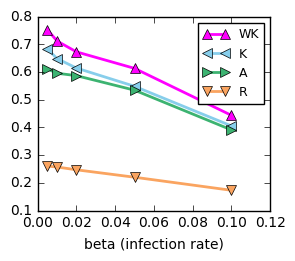

In [10]:
## half infect time vs beta
dataset = "fdu2014"
halfT = json.load(open(datapath+"%s\\spreadingResult\\targetImmune\\scale\\halfSpreadingTime.json"%dataset))
betas = [0.005, 0.01, 0.02, 0.05, 0.1]
f = 0.2
strategies = ["wit","k","acquaintance_degree","R"]
strategiename = {"wit":"WK","k":"K","acquaintance_degree":"A","R":"R"}
markers = ["-^","-<","->","-v"]
colors = ["fuchsia","skyblue","mediumseagreen","sandybrown"]
#strategies = ["n_k","n_a","n_wit"]
fig = plt.figure(figsize=(3,2.5))
ax = plt.subplot(111)
ci =0
for si in strategies:
    x = betas
    y = [halfT[str(xi)][str(f)][str(si)][0] for xi in x]
    if dataset ==  "fdu2013":
        if si!="R":
            y[2] = y[2] - 0.25
        else:
            y[2] = y[2] - 0.08
    if dataset == "fdu2014":
        if si!="R":
            y[1] = y[1] + 0.05
            y[2] = y[2] - 0.28
        else:
            y[2] = y[2] - 0.23
    plt.plot(x,y,markers[ci],label=strategiename[si], linewidth=2,color = colors[ci], markersize = 7)
    ci+=1
ax.legend(loc="upper right", fontsize=9)
ax.set_xlabel("beta (infection rate)")
plt.show()

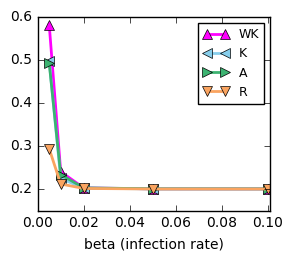

In [11]:
## final infect scale vs beta
dataset = "fdu2014"
finalScale = json.load(open(datapath+"%s\\spreadingResult\\targetImmune\\scale\\finalScale_target.json"%dataset))
betas = [0.005, 0.01, 0.02, 0.05, 0.1]
f = 0.2
strategies = ["wit","k","acquaintance_degree","R"]
strategiename = {"wit":"WK","k":"K","acquaintance_degree":"A","R":"R"}
markers = ["-^","-<","->","-v"]
colors = ["fuchsia","skyblue","mediumseagreen","sandybrown"]
# strategies = ["n_k","n_a","n_wit"]
fig = plt.figure(figsize=(3,2.5))
ax = plt.subplot(111)
ci = 0
for si in strategies:
    x = betas
    y = [finalScale[str(xi)][str(f)][str(si)][0] for xi in x]
    if si=="wit":
        y[0] = y[0]+0.02
        y[1] = y[1]+0.005
    plt.plot(x,y,markers[ci],label=strategiename[si], linewidth=2,color = colors[ci], markersize = 7)
    ci += 1
ax.legend(loc="upper right", fontsize=9)
ax.set_xlabel("beta (infection rate)")
ax.set_xlim(0,0.101)
plt.show()

In [15]:
dataset = "others"
fr = open(datapath + "%s\\hosp_contact.dat"%(dataset))
g = nx.Graph()
count = 0
line = fr.readline().replace("\n","")
while line:
    count += 1
    if count%100000==0:
        print count
    n1,n2 = line.split("\t")[1:3]
    g.add_edge(n1,n2)
    line = fr.readline().replace("\n","")
fr.close()
print "calculating"
print "average clustering:",nx.average_clustering(g)
print "average shortest path length:",nx.average_shortest_path_length(g)

calculating
average clustering: 0.640279653991
average shortest path length: 1.59783783784


In [ ]:
import pymongo
database = "realitymining"
conn = pymongo.Connection('localhost', 27017)
db = conn[database]
alldata = db.dyaddata.find({},snapshot = True) # modify the dataset
g = nx.Graph()
for di in alldata:
    n1,n2 = di["dyadID"].split("&")
    g.add_edge(n1,n2)
print nx.average_clustering(g)
print nx.average_shortest_path_length(g)
conn.close()

In [16]:
## average interaction location number and distribution
datapath = "fdu2009"
l = []
fr = open(datapath+"%s\\basic\\dyad_e_r_t_l_w_all_%s.txt"(dataset,dataset))
line = fr.readline().replace("\n","")
while line:
    li = int(line.split("\t")[4])
    l.append(li)
    line = fr.readline().replace("\n","")
fr.close()
print sum(l)/float(len(l))
weights = np.ones_like(l)/float(len(l))
n,bins = np.histogram(l, bins=20,weights=weights)
plt.plot(bins[:-1],n,'-o', label="+".join(typei))
plt.show()


TypeError: 'str' object is not callable

In [ ]:
## gowalla (degree ditrubution)